# B(M1) analysis

Collect proton/neutron M1 matrix elements from runs using random samples of USDB

$ B(M1) = \left[ g_s^p M_s^p + g_l^p M_l^p +  g_s^n M_s^n + g_l^n M_l^n  \right] ^2$ 

Free nucleon values:

$g_s^p = 5.5857$

$g_s^n = -3.8263 $

$g_l^p = 1.0 $

$g_l^n = 0.0 $ 



In [1]:
import numpy as np

import os
from glob import glob
from tqdm import tqdm

def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)

import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'serif'  : ['Palatino'],
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import pickle as pkl
import sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [2]:
from scipy.special import factorial2

hbarc = 197300 #keV fm
hbar = 6.582E-19 #keV s
alpha = 1/137
mP = 938272 # kev/c^2
#muN = 3.152E-14 # MeV / T
muN2 =  alpha*hbarc**3*2*mP**-2 # nuclear magneton squared


def Thalf_width(E): #converts energy width (MeV) to Thalf in seconds
    return hbar * np.log(2)/(E/1000)

def Thalf_width_kev(E):
    if E==0.:
        return None
    return Thalf_width(E)

def times_so_far(ls):
    out = [0]*len(ls)
    for i in range(len(ls)):
        out[i] = ls[:i+1].count(ls[i])
    return out

def j_to_twoj(x):
    if '/2' in x:
        return int(x.strip('/2'))
    else:
        return 2*int(x.strip('()'))
    
def thalf_units_to_sec(units,value):
    m=0
    if units=='PS':
        m = 10**-12
    elif units=='NS':
        m = 10**-9
    elif units=='FS':
        m = 10**-15
    elif units=='US':
        m = 10**-6
    elif units=='AS':
        m = 10**-18
    elif units=='KEV':
        pass
    if m==0:
        return Thalf_width_kev(value)
    else:
        return m*value
    
def fLambda(l):
    return 8*np.pi*(l+1)/(l*(factorial2(2*l+1)**2))

def Bweisskopf(l,A):
    # Weisskopf estimate for El
    return (1/(4*np.pi)) * (3/(3+l))**2 * (1.2*A**(1/3))**(2*l)
    
def B_M1_Wu(B):
    return B / 1.79

In [3]:
path_to_usdb_csv = '/p/lustre2/fox39/shmuq/usdb/shmuq_m1/sd_M1_usdb.csv'
df_usdb = pd.read_csv(path_to_usdb_csv)

In [4]:
df_usdb

,Unnamed: 0,A,Element,Z,N,Energy (keV),Energy Unc (keV),Ji,Thalf,E_gamma (keV),E_gamma Unc (keV),I_gamma,I_gamma Unc,Mult,B_exp (W.u.),B_exp Unc (W.u.),twoJi,Thalf Value,Thalf Units,Thalf Unc,Thalf (sec),Thalf Unc (sec),B_exp (mu_N^2),B_exp Unc (mu_N^2),Nucleus,Jf,twoJf,ni,nf,Include,Mth_sp,Mth_sn,Mth_lp,Mth_ln
0,1,18,O,8,10,3920.4400,0.1400,2,18.4 FS 2,1938.0000,0.0000,87.600,0.700,M1,0.1400,0.0200,4,18.400,FS,2.000,1.840000e-14,2.000000e-15,0.250669,0.035810,18O,2,4,2,1,True,0.0000,-0.0900,0.0000,0.0900
1,2,18,O,8,10,5254.8000,0.9000,2,7.0 FS 0.3,1334.0000,0.0000,8.700,0.400,M1,0.1110,0.0080,4,7.000,FS,0.300,7.000000e-15,3.000000e-16,0.198745,0.014324,18O,2,4,3,2,True,0.0000,0.1849,0.0000,-0.1849
2,4,19,O,8,11,96.0000,0.5000,3/2,1.39 NS 0.05,96.0000,0.0000,100.000,0.000,M1,0.0880,0.0380,3,1.390,NS,0.050,1.390000e-09,5.000000e-11,0.157563,0.068039,19O,5/2,5,1,1,True,0.0000,-0.0439,0.0000,0.0439
3,6,18,F,9,9,1700.8100,0.1800,1,662 FS 19,659.0000,0.0000,70.200,1.300,M1,0.0805,0.0027,2,662.000,FS,19.000,6.620000e-13,1.900000e-14,0.144135,0.004834,18F,0,0,2,1,True,0.0268,-0.0268,0.3135,-0.3135
4,12,18,F,9,9,3839.1700,0.2200,2,13.2 FS 1.9,777.0000,0.0000,50.000,3.000,M1,1.7000,0.3000,4,13.200,FS,1.900,1.320000e-14,1.900000e-15,3.043838,0.537148,18F,2,4,3,2,True,0.1563,-0.1563,0.3789,-0.3789
5,13,18,F,9,9,4115.9000,0.2500,3,63 FS 15,1054.0000,0.0000,95.000,3.000,M1,0.2800,0.0700,6,63.000,FS,15.000,6.300000e-14,1.500000e-14,0.501338,0.125335,18F,2,4,3,2,True,-0.1040,0.1040,-0.1876,0.1876
6,14,18,F,9,9,4360.1500,0.2600,1,19 FS 7,1298.0000,0.0000,100.000,0.000,M1,0.5000,0.2000,2,19.000,FS,7.000,1.900000e-14,7.000000e-15,0.895247,0.358099,18F,2,4,4,2,True,0.1352,0.1352,-0.1352,-0.1352
7,15,18,F,9,9,5297.6000,1.5000,4,21 FS 3,646.0000,0.0000,1.300,0.300,M1,0.0190,0.0090,8,21.000,FS,3.000,2.100000e-14,3.000000e-15,0.034019,0.016114,18F,4,8,2,1,True,-0.1606,0.1606,0.0920,-0.0920
8,16,18,F,9,9,6163.2000,0.9000,3,14.0 KEV 0.5,2047.0000,0.0000,1.500,0.300,M1,0.0780,0.0330,6,14.000,KEV,0.500,3.258782e-20,9.124589e-19,0.139658,0.059086,18F,3,6,4,3,True,-0.0149,0.0149,-0.0706,0.0706
9,17,18,F,9,9,6163.2000,0.9000,3,14.0 KEV 0.5,3640.0000,0.0000,5.500,0.400,M1,0.0520,0.0170,6,14.000,KEV,0.500,3.258782e-20,9.124589e-19,0.093106,0.030438,18F,2,4,4,1,True,-0.0125,0.0125,0.1954,-0.1954


In [5]:
idx = df_usdb[(df_usdb['Mth_sp']==-999.0) | (df_usdb['Mth_lp']==-999.0) | (df_usdb['Mth_sn']==-999.0) | (df_usdb['Mth_ln']==-999.0)].index
df_usdb.loc[idx,'Include']=False

idx = df_usdb[(df_usdb['Mth_sp']==0.0) & (df_usdb['Mth_lp']==0.0) & (df_usdb['Mth_sn']==0.0) & (df_usdb['Mth_ln']==0.0)].index
df_usdb.loc[idx,'Include']=False

B_min = 0.01
n_max = 6
idx = df_usdb[(df_usdb['ni']>n_max) | (df_usdb['nf']>n_max)].index
df_usdb.loc[idx,'Include']=False

idx = df_usdb[(df_usdb['B_exp (W.u.)']<B_min)].index
df_usdb.loc[idx,'Include']=False

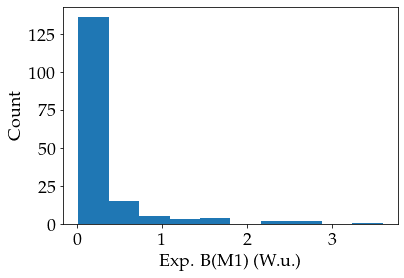

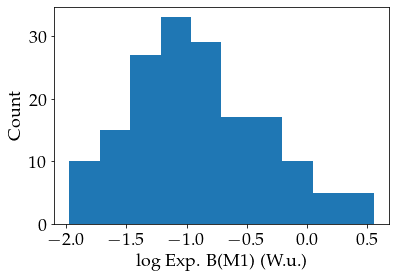

Out of 168 transitions, 155 are smaller than the Weisskopf estimate


In [6]:
y = df_usdb['B_exp (W.u.)']
plt.hist(y, bins=10, density=False)
plt.xlabel('Exp. B(M1) (W.u.)')
plt.ylabel('Count')
plt.show()

y = np.log10(df_usdb['B_exp (W.u.)'])
plt.hist(y, bins=10, density=False)
plt.xlabel('log Exp. B(M1) (W.u.)')
plt.ylabel('Count')
plt.show()
print(f'Out of {len(y)} transitions, {len(y[y<0])} are smaller than the Weisskopf estimate')

In [7]:
df_usdb = df_usdb.rename(columns={'Unnamed: 0':'Index'})

In [8]:
df_usdb = df_usdb[df_usdb['Include']==True]

In [9]:
usdbmil = np.loadtxt('/p/lustre2/fox39/shmuq/usdb/shmuq_m1/usdbmil.vec',skiprows=1)
usdb = np.loadtxt('/p/lustre2/fox39/shmuq/usdb/shmuq_m1/usdb.vec',skiprows=1)

In [10]:
n_transitions = len(df_usdb)
n_params = 66
print('# transitions =', n_transitions)

# transitions = 143


In [11]:
df_usdb.keys()

Index(['Index', 'A', 'Element', 'Z', 'N', 'Energy (keV)', 'Energy Unc (keV)',
       'Ji', 'Thalf', 'E_gamma (keV)', 'E_gamma Unc (keV)', 'I_gamma',
       'I_gamma Unc', 'Mult', 'B_exp (W.u.)', 'B_exp Unc (W.u.)', 'twoJi',
       'Thalf Value', 'Thalf Units', 'Thalf Unc', 'Thalf (sec)',
       'Thalf Unc (sec)', 'B_exp (mu_N^2)', 'B_exp Unc (mu_N^2)', 'Nucleus',
       'Jf', 'twoJf', 'ni', 'nf', 'Include', 'Mth_sp', 'Mth_sn', 'Mth_lp',
       'Mth_ln'],
      dtype='object')

In [12]:
# plot error distribution with free nucleon couplings
B_exp = np.array(df_usdb['B_exp (W.u.)'])
B_exp_unc = np.array(df_usdb['B_exp Unc (W.u.)'])
M_sp = np.array(df_usdb['Mth_sp'])
M_lp = np.array(df_usdb['Mth_lp'])
M_sn = np.array(df_usdb['Mth_sn'])
M_ln = np.array(df_usdb['Mth_ln'])
g_sp_free = 5.5857
g_lp_free = 1.
g_sn_free = -3.8263
g_ln_free = 0.

def B_th(g_vec):
    g_sp, g_lp, g_sn, g_ln = g_vec
    B = ( g_sp * M_sp + g_lp * M_lp + g_sn * M_sn + g_ln * M_ln )**2
    return B

def chi2(g_vec,B_th_unc):
    # in W.u.
    R2 = (B_exp - B_M1_Wu(B_th(g_vec)))**2 / (B_exp_unc**2 + B_th_unc**2)
    chi2 = np.sum(R2)
    return chi2

g_vec_free = [g_sp_free, g_lp_free, g_sn_free, g_ln_free]
chi2(g_vec_free,0.51)/(n_transitions - n_params)

1.0197551055178697

In [13]:
def objective(x):
    return (1 -  ( chi2(g_vec_free,x)/(n_transitions - n_params) ) )**2

from scipy.optimize import minimize_scalar
opt_result = minimize_scalar(objective,)
print(opt_result.x)

0.5153812211207364


/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


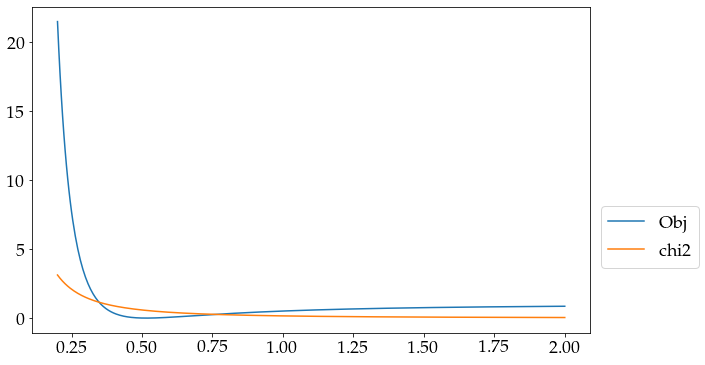

In [14]:
domain = np.linspace(0.2,2,400)
y = [objective(x) for x in domain]
y2 = [chi2(g_vec_free,x)/(len(B_exp)-4) for x in domain]

plt.figure(figsize=(10,6))
plt.plot(domain,y,label='Obj')
plt.plot(domain,y2,label='chi2')
plt.legend(loc = (1.02,0.2))
plt.show()

In [15]:
B_M1_th_unc = opt_result.x

In [16]:
from scipy.optimize import least_squares
opt = least_squares(chi2, x0=g_vec_free, args=[B_M1_th_unc])
g_vec_opt = opt.x

print(g_vec_opt)

[ 3.99033918  1.08233821 -1.71747097 -0.59699094]


In [17]:
with open('m1_results_10k_140422.pkl','rb') as fh:
    data = pkl.load(fh)
    
int_vec_list = []
mil_vec_list = []
df_dict = {}
for number in data:
    df_dict[number] = data[number][0]
    int_vec_list.append(data[number][1])
    mil_vec_list.append(data[number][2])

n_samples = len(df_dict)
print(f'Total number of samples = {n_samples}')

Total number of samples = 9932


In [18]:
int_vec_array = np.array(int_vec_list)
mil_vec_array = np.array(mil_vec_list)

### PCA-parameter sample distributions
Note that below each is 1/variance = Hessian eigenvalue.

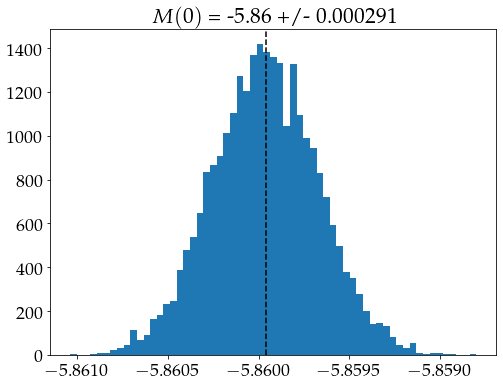

1/variance =  11847641.32193134


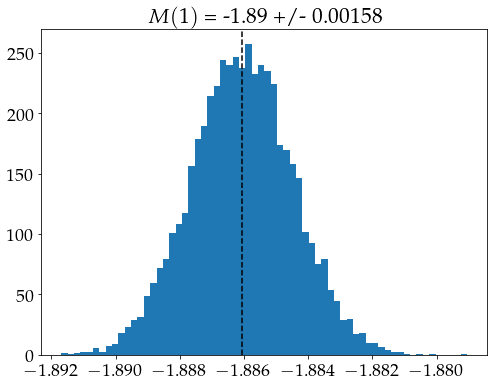

1/variance =  399154.96676004765


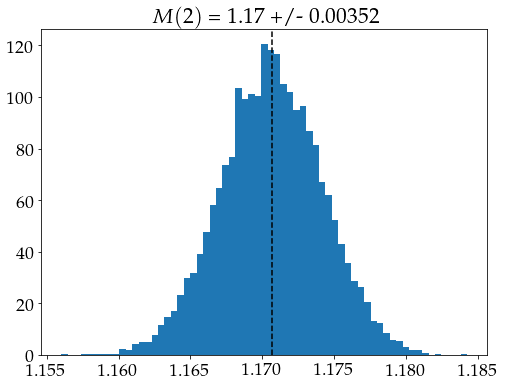

1/variance =  80930.47351052753


In [19]:
# for mi in range(n_params):
for mi in range(3):
    y = mil_vec_array[:,mi]
    plt.figure(figsize=(8,6))
    plt.hist(y,bins=optimal_n_bins(y),density=True)
    plt.title(fr'$M({mi})$ = {np.mean(y):5.3} +/- {np.std(y):5.3}')
    plt.axvline(usdbmil[mi],c='k',ls='--')
    plt.show()
    print('1/variance = ',(1/np.std(y))**2)

### USDB parameter sample distributions

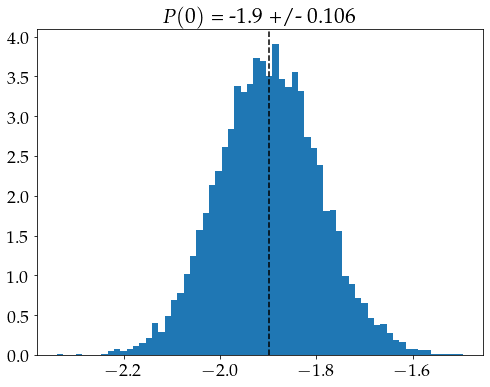

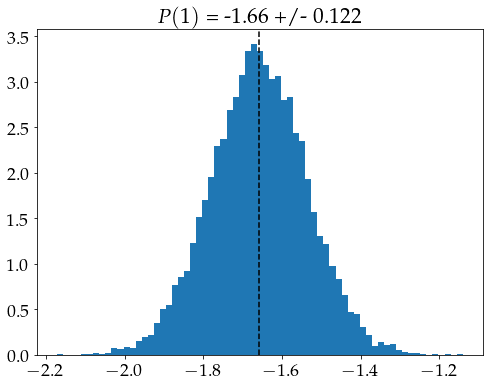

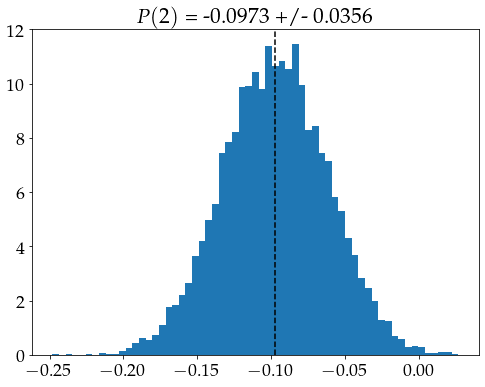

In [20]:
# for pi in range(n_params):
for pi in range(3):
    y = int_vec_array[:,pi]
    plt.figure(figsize=(8,6))
    plt.hist(y,bins=optimal_n_bins(y),density=True)
    plt.title(fr'$P({pi})$ = {np.mean(y):5.3} +/- {np.std(y):5.3}')
    plt.axvline(usdb[pi],c='k',ls='--')
    plt.show()

### Shell-model B(M1) distributions 

In [21]:
from time import time

def format_nuc_name(s):
    A = s[:2]
    el = s[2:]
    A_up = r'$^{%s}$' % A
    return f'{A_up}{el}'

def matrix_element_distributions(index,plot=False,debug=False,pdf=None):
    print_times = False
    times = []
    times.append(time())
    
    print('INDEX = ',index)
    t_usdb = df_usdb[df_usdb['Index']==index].iloc[0]
    if debug:  print("USDB TRANSITION:\n",t_usdb)
    nuc = t_usdb['Nucleus']
    A = t_usdb['A']
    Z = t_usdb['Z']
    N = t_usdb['N']
    ji = t_usdb['Ji']
    ni = t_usdb['ni']
    jf = t_usdb['Jf']
    nf = t_usdb['nf']
    times.append(time())
    
    t_sample_list = [df_dict[run_num_string][df_dict[run_num_string]['Index']==index].iloc[0] for run_num_string in list(df_dict.keys()) ]
    times.append(time())
    
    if debug: print("SAMPLE TRANSITION:\n",t_sample_list[0])
#     Mth_sp_vec = np.array([df_dict[run_num_string].iloc[ti]['Mth_sp'] for run_num_string in list(df_dict.keys()) ])
#     Mth_sn_vec = np.array([df_dict[run_num_string].iloc[ti]['Mth_sn'] for run_num_string in list(df_dict.keys()) ])
#     Mth_lp_vec = np.array([df_dict[run_num_string].iloc[ti]['Mth_lp'] for run_num_string in list(df_dict.keys()) ])
#     Mth_ln_vec = np.array([df_dict[run_num_string].iloc[ti]['Mth_ln'] for run_num_string in list(df_dict.keys()) ])
    Mth_sp_vec = np.array([t['Mth_sp'] for t in t_sample_list ])
    Mth_sn_vec = np.array([t['Mth_sn'] for t in t_sample_list ])
    Mth_lp_vec = np.array([t['Mth_lp'] for t in t_sample_list ])
    Mth_ln_vec = np.array([t['Mth_ln'] for t in t_sample_list ])

    Mth_sp_usdb = t_usdb['Mth_sp']
    Mth_sn_usdb = t_usdb['Mth_sn']
    Mth_lp_usdb = t_usdb['Mth_lp']
    Mth_ln_usdb = t_usdb['Mth_ln']
    
    print('USDB raw:')
    print(f'M_sp = {Mth_sp_usdb}')
    print(f'M_sn = {Mth_sn_usdb}')
    print(f'M_lp = {Mth_lp_usdb}')
    print(f'M_ln = {Mth_ln_usdb}')
    
    me_sum = Mth_sp_usdb + Mth_sn_usdb + Mth_lp_usdb + Mth_ln_usdb
    
    times.append(time())
    
    check_list = [np.round(t_usdb['B_exp (W.u.)'],5),
                np.round(t_sample_list[0]['B_exp (W.u.)'],5) ]
    
    err_cond = check_list[0] != check_list[1]
    print(err_cond)
    if err_cond:
        print('-'*40)
        print('ERROR: input transition does not match output transition')
        print('transition index = ',ti)
        print('-'*40)
        return None

        print(t_sample_list[0])

    times.append(time())
    
    no_proton = np.array_equal(Mth_sp_vec,np.zeros_like(Mth_sp_vec)) and np.array_equal(Mth_lp_vec,np.zeros_like(Mth_lp_vec))
    no_neutron = np.array_equal(Mth_sn_vec,np.zeros_like(Mth_sn_vec)) and np.array_equal(Mth_ln_vec,np.zeros_like(Mth_ln_vec))
    if no_proton:
        print('Proton parts are all zero')
        n_rel_sign = np.sign(Mth_sn_vec)*np.sign(Mth_ln_vec)
        Mth_sn_vec = np.abs(Mth_sn_vec)
        Mth_ln_vec = n_rel_sign*np.abs(Mth_ln_vec)
        
        n_rel_sign_usdb = np.sign(Mth_sn_usdb)*np.sign(Mth_ln_usdb)
        Mth_sn_usdb = np.abs(Mth_sn_usdb)
        Mth_ln_usdb = n_rel_sign_usdb*np.abs(Mth_ln_usdb)
        
        no_proton = True
    elif no_neutron:
        print('Neutron parts are all zero')
        p_rel_sign = np.sign(Mth_sp_vec)*np.sign(Mth_lp_vec)
        Mth_sp_vec = np.abs(Mth_sp_vec)
        Mth_lp_vec = p_rel_sign*np.abs(Mth_sp_vec)
        
        p_rel_sign_usdb = np.sign(Mth_sp_usdb)*np.sign(Mth_lp_usdb)
        Mth_sp_usdb = np.abs(Mth_sp_usdb)
        Mth_lp_usdb = p_rel_sign_usdb*np.abs(Mth_lp_usdb)
        
        no_neutron = True
    else:
        phase_sn = np.sign(Mth_sp_vec)*np.sign(Mth_sn_vec)
        phase_lp = np.sign(Mth_sp_vec)*np.sign(Mth_lp_vec)
        phase_ln = np.sign(Mth_sp_vec)*np.sign(Mth_ln_vec)
        Mth_sp_vec = np.abs(Mth_sp_vec)  #Mth_sp >0 always
        Mth_sn_vec = phase_sn*np.abs(Mth_sn_vec)
        Mth_lp_vec = phase_lp*np.abs(Mth_lp_vec)
        Mth_ln_vec = phase_ln*np.abs(Mth_ln_vec)
        
        phase_sn_usdb = np.sign(Mth_sp_usdb)*np.sign(Mth_sn_usdb)
        phase_lp_usdb = np.sign(Mth_sp_usdb)*np.sign(Mth_lp_usdb)
        phase_ln_usdb = np.sign(Mth_sp_usdb)*np.sign(Mth_ln_usdb)
        Mth_sp_usdb = np.abs(Mth_sp_usdb)  #Mth_sp >0 always
        Mth_sn_usdb = phase_sn_usdb*np.abs(Mth_sn_usdb)
        Mth_lp_usdb = phase_lp_usdb*np.abs(Mth_lp_usdb)
        Mth_ln_usdb = phase_ln_usdb*np.abs(Mth_ln_usdb)
    
    print('USDB after phase standardization:')
    print(f'M_sp = {Mth_sp_usdb}')
    print(f'M_sn = {Mth_sn_usdb}')
    print(f'M_lp = {Mth_lp_usdb}')
    print(f'M_ln = {Mth_ln_usdb}')
    
    if me_sum**2 != (Mth_sp_usdb + Mth_sn_usdb + Mth_lp_usdb + Mth_ln_usdb)**2:
        print('ERROR: Phase standardization failed.')
        return None
    
    if np.isnan(np.sum(Mth_sp_vec)):
        print('NAN detected in proton spin part!')
        return None
    if np.isnan(np.sum(Mth_sn_vec)):
        print('NAN detected in neutron spin part!')
        return None
    if np.isnan(np.sum(Mth_lp_vec)):
        print('NAN detected in proton orbit part!')
        return None
    if np.isnan(np.sum(Mth_ln_vec)):
        print('NAN detected in neutron orbit part!')
        return None
    
    times.append(time())
    
    leave_out_outliers = True
    if leave_out_outliers:
        outlier_factor = 5
        count = 0
        sp_mean = np.mean(Mth_sp_vec)
        sn_mean = np.mean(Mth_sn_vec)
        lp_mean = np.mean(Mth_lp_vec)
        ln_mean = np.mean(Mth_ln_vec)
        sp_window = outlier_factor*np.std(Mth_sp_vec)
        sn_window = outlier_factor*np.std(Mth_sn_vec)
        lp_window = outlier_factor*np.std(Mth_lp_vec)
        ln_window = outlier_factor*np.std(Mth_ln_vec)
        for si in range(n_samples):
            sp_out = np.abs(Mth_sp_vec[si] - sp_mean) > sp_window
            sn_out = np.abs(Mth_sn_vec[si] - sn_mean) > sn_window
            lp_out = np.abs(Mth_lp_vec[si] - lp_mean) > lp_window
            ln_out = np.abs(Mth_ln_vec[si] - ln_mean) > ln_window
            if sp_out or sn_out or lp_out or ln_out:
                np.delete(Mth_sp_vec,[si],0)
                np.delete(Mth_sn_vec,[si],0)
                np.delete(Mth_lp_vec,[si],0)
                np.delete(Mth_ln_vec,[si],0)
                count+=1
        print(f'Dropped {count} outliers.')
    
    if no_neutron and no_proton:
        print('THERE IS NO TRANSITION')
        return None
        
    print('Standard Deviations:')
    print(f'    Proton spin = {np.std(Mth_sp_vec)}')
    print(f'    Neutron spin = {np.std(Mth_sn_vec)}')
    print(f'    Proton orbit = {np.std(Mth_lp_vec)}')
    print(f'    Neutron orbit = {np.std(Mth_ln_vec)}')
    
    color_sp = 'salmon'
    color_sn = 'lightblue'
    color_lp = 'lightgreen'
    color_ln = 'plum'
    color_sp_usdb = 'red'
    color_sn_usdb = 'blue'
    color_lp_usdb = 'forestgreen'
    color_ln_usdb = 'darkviolet'
    sp_ls = 'solid'
    sn_ls = 'dashed'
    lp_ls = 'dotted'
    ln_ls = 'dashdot'
    hatch_patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
    hatch_sp = hatch_patterns[0]
    hatch_sn = hatch_patterns[1]
    hatch_lp = hatch_patterns[2]
    hatch_ln = hatch_patterns[3]

    times.append(time())
    
    std_threshold = 1e-10
    title_string = fr'{format_nuc_name(nuc)} $({ji}_{ni}) \rightarrow ({jf}_{nf})$'
    if t_usdb['Include']:
        inc_str = 'Included in UQ'
    else:
        inc_str = 'Excluded from UQ'
    title_string += "\n" + inc_str
    
    
    if plot:
        plt.figure(figsize=(11,6))
        if no_neutron:
            #only plot proton parts
            if (np.std(Mth_sp_vec) < std_threshold) | (np.std(Mth_lp_vec) < std_threshold):
                print('Proton part constant.')
                bins_sp = 10
                bins_lp = 10
            else:
                bins_sp = optimal_n_bins(Mth_sp_vec)
                bins_lp = optimal_n_bins(Mth_lp_vec)

            plt.hist(Mth_sp_vec, bins=bins_sp, density=True,color=color_sp, label='Proton S', hatch=hatch_sp)
            plt.hist(Mth_lp_vec, bins=bins_lp, density=True,color=color_lp, label='Proton L', hatch=hatch_lp)
            plt.axvline(Mth_sp_usdb,ls=sp_ls,color=color_sp_usdb,label='USDB Proton S')
            plt.axvline(Mth_lp_usdb,ls=lp_ls,color=color_lp_usdb,label='USDB Proton L')
            plt.xlabel('Mth (Proton only)')
            
        elif no_proton:
            if (np.std(Mth_sn_vec)<std_threshold) | (np.std(Mth_ln_vec)<std_threshold):
                print('Neutron part constant.')
                bins_sn=10
                bins_ln=10
            else:
                bins_sn = optimal_n_bins(Mth_sn_vec)
                bins_ln = optimal_n_bins(Mth_ln_vec)
            print(Mth_sn_vec)
            plt.hist(Mth_sn_vec,bins=bins_sn, density=True,color=color_sn, label='Neutron S', hatch=hatch_sn)
            plt.hist(Mth_ln_vec,bins=bins_ln, density=True,color=color_ln, label='Neutron L', hatch=hatch_ln)
            plt.axvline(Mth_sn_usdb,ls=sn_ls,color=color_sn_usdb,label='USDB Neutron S')
            plt.axvline(Mth_ln_usdb,ls=ln_ls,color=color_ln_usdb,label='USDB Neutron L')
            plt.xlabel('Mth (Neutron only)')

        else:    
            bins_sp = optimal_n_bins(Mth_sp_vec)
            bins_sn = optimal_n_bins(Mth_sn_vec)
            bins_lp = optimal_n_bins(Mth_lp_vec)
            bins_ln = optimal_n_bins(Mth_ln_vec)
            plt.hist(Mth_sp_vec, bins=bins_sp, density=True, alpha = 0.5, label='Proton S',color=color_sp, hatch=hatch_sp)
            plt.hist(Mth_sn_vec, bins=bins_sn, density=True, alpha = 0.5, label='Neutron S',color=color_sn, hatch=hatch_sn)
            plt.hist(Mth_lp_vec, bins=bins_lp, density=True, alpha = 0.5, label='Proton L',color=color_lp, hatch=hatch_lp)
            plt.hist(Mth_ln_vec, bins=bins_ln, density=True, alpha = 0.5, label='Neutron L',color=color_ln, hatch=hatch_ln)
            plt.axvline(Mth_sp_usdb,ls=sp_ls,color=color_sp_usdb,label='USDB Proton S')
            plt.axvline(Mth_sn_usdb,ls=sn_ls,color=color_sn_usdb,label='USDB Neutron S')
            plt.axvline(Mth_lp_usdb,ls=lp_ls,color=color_lp_usdb,label='USDB Proton L')
            plt.axvline(Mth_ln_usdb,ls=ln_ls,color=color_ln_usdb,label='USDB Neutron L')
            plt.xlabel('Mth')
        plt.title(title_string)
        plt.ylabel('Density (no units)')
        plt.legend(loc=(1.02,0.2))
        plt.tight_layout()
        
        if pdf is None:
            plt.show()
        else:
            pdf.savefig()
            plt.close()

    nuc_dict = {'Nucleus':nuc,
                'A':A,
                'Z':Z,
                'N':N,
                'Ji':ji,
                'Jf':jf,
                'ni':ni,
                'nf':nf,
               }
    return nuc_dict, Mth_sp_usdb, Mth_sn_usdb, Mth_lp_usdb, Mth_ln_usdb, Mth_sp_vec, Mth_sn_vec, Mth_lp_vec, Mth_ln_vec, title_string

In [23]:
drop_indices = [31,15,45,66,65,62,43,18,33,24,30,26,27,14,35,19]
df_usdb[df_usdb['Index'].isin(drop_indices)]
    

,Index,A,Element,Z,N,Energy (keV),Energy Unc (keV),Ji,Thalf,E_gamma (keV),E_gamma Unc (keV),I_gamma,I_gamma Unc,Mult,B_exp (W.u.),B_exp Unc (W.u.),twoJi,Thalf Value,Thalf Units,Thalf Unc,Thalf (sec),Thalf Unc (sec),B_exp (mu_N^2),B_exp Unc (mu_N^2),Nucleus,Jf,twoJf,ni,nf,Include,Mth_sp,Mth_sn,Mth_lp,Mth_ln
6,14,18,F,9,9,4360.15,0.26,1,19 FS 7,1298.00,0.00,100.0,0.0,M1,0.5000,0.2000,2,19.00,FS,7.00,1.900000e-14,7.000000e-15,0.895247,0.358099,18F,2,4,4,2,True,0.1352,0.1352,-0.1352,-0.1352
7,15,18,F,9,9,5297.60,1.50,4,21 FS 3,646.00,0.00,1.3,0.3,M1,0.0190,0.0090,8,21.00,FS,3.00,2.100000e-14,3.000000e-15,0.034019,0.016114,18F,4,8,2,1,True,-0.1606,0.1606,0.0920,-0.0920
10,18,18,F,9,9,6163.20,0.90,3,14.0 KEV 0.5,3101.00,0.00,1.3,0.3,M1,0.0190,0.0100,6,14.00,KEV,0.50,3.258782e-20,9.124589e-19,0.034019,0.017905,18F,2,4,4,2,True,0.0003,0.0003,-0.0003,-0.0003
11,19,18,F,9,9,6163.20,0.90,3,14.0 KEV 0.5,2324.00,0.00,25.0,1.6,M1,0.9100,0.2300,6,14.00,KEV,0.50,3.258782e-20,9.124589e-19,1.629349,0.411813,18F,2,4,4,3,True,0.0338,-0.0338,-0.1073,0.1073
15,24,18,F,9,9,6283.20,0.90,2,10.0 KEV 0.5,2444.00,0.00,15.8,1.4,M1,0.9100,0.2900,4,10.00,KEV,0.50,4.562295e-20,9.124589e-19,1.629349,0.519243,18F,2,4,5,3,True,-0.0925,-0.0925,0.0925,0.0925
17,26,18,F,9,9,6283.20,0.90,2,10.0 KEV 0.5,2167.00,0.00,3.9,0.2,M1,0.3300,0.1100,4,10.00,KEV,0.50,4.562295e-20,9.124589e-19,0.590863,0.196954,18F,3,6,5,3,True,-0.0710,-0.0710,0.0710,0.0710
18,27,18,F,9,9,6310.50,0.80,3,0.95 KEV 0.14,2195.00,0.00,2.4,1.7,M1,0.0180,0.0140,6,0.95,KEV,0.14,4.802416e-19,3.258782e-18,0.032229,0.025067,18F,3,6,5,3,True,-0.0212,-0.0212,0.0212,0.0212
21,30,18,F,9,9,6385.50,1.70,2,0.49 KEV 0.09,4685.00,0.00,6.8,1.7,M1,0.0140,0.0070,4,0.49,KEV,0.09,9.310806e-19,5.069216e-18,0.025067,0.012533,18F,1,2,6,2,True,0.0124,0.0124,-0.0124,-0.0124
22,31,18,F,9,9,6385.50,1.70,2,0.49 KEV 0.09,2270.00,0.00,2.3,0.5,M1,0.0410,0.0200,4,0.49,KEV,0.09,9.310806e-19,5.069216e-18,0.073410,0.035810,18F,3,6,6,3,True,-0.2563,0.2563,0.1038,-0.1038
23,33,18,F,9,9,6484.90,1.50,3,0.40 KEV 0.1,3423.00,0.00,21.0,3.0,M1,0.0190,0.0070,6,0.40,KEV,0.10,1.140574e-18,4.562295e-18,0.034019,0.012533,18F,2,4,6,2,True,-0.0067,-0.0067,0.0067,0.0067


In [ ]:
drop_indices = [31,15,45,66,65,62,43,18,33,24,30,26,27,14,35,19]
# drop these indices, Fluorine transitions with large errors
for num,df in df_dict.items():
    df_dict[num] = df.rename(columns={'Unnamed: 0':'Index'})
    df_dict[num] = df_dict[num][~df_dict[num]['Index'].isin(drop_indices)]
    
    

In [52]:
df_usdb = df_usdb[~df_usdb['Index'].isin(drop_indices)]

In [49]:
df_dict['00035']

,Index,A,Element,Z,N,Energy (keV),Energy Unc (keV),Ji,Thalf,E_gamma (keV),E_gamma Unc (keV),I_gamma,I_gamma Unc,Mult,B_exp (W.u.),B_exp Unc (W.u.),twoJi,Thalf Value,Thalf Units,Thalf Unc,Thalf (sec),Thalf Unc (sec),B_exp (mu_N^2),B_exp Unc (mu_N^2),Nucleus,Jf,twoJf,ni,nf,Include,Mth_sp,Mth_sn,Mth_lp,Mth_ln
0,1,18,O,8,10,3920.4400,0.1400,2,18.4 FS 2,1938.0000,0.0000,87.600,0.700,M1,0.1400,0.0200,4,18.40,FS,2.00,1.840000e-14,2.000000e-15,0.250669,0.035810,18O,2,4,2,1,True,0.0000,-0.0907,0.0000,0.0907
1,2,18,O,8,10,5254.8000,0.9000,2,7.0 FS 0.3,1334.0000,0.0000,8.700,0.400,M1,0.1110,0.0080,4,7.00,FS,0.30,7.000000e-15,3.000000e-16,0.198745,0.014324,18O,2,4,3,2,True,0.0000,0.1885,0.0000,-0.1885
2,4,19,O,8,11,96.0000,0.5000,3/2,1.39 NS 0.05,96.0000,0.0000,100.000,0.000,M1,0.0880,0.0380,3,1.39,NS,0.05,1.390000e-09,5.000000e-11,0.157563,0.068039,19O,5/2,5,1,1,True,0.0000,0.0449,0.0000,-0.0449
3,6,18,F,9,9,1700.8100,0.1800,1,662 FS 19,659.0000,0.0000,70.200,1.300,M1,0.0805,0.0027,2,662.00,FS,19.00,6.620000e-13,1.900000e-14,0.144135,0.004834,18F,0,0,2,1,True,-0.0155,0.0155,-0.2971,0.2971
4,12,18,F,9,9,3839.1700,0.2200,2,13.2 FS 1.9,777.0000,0.0000,50.000,3.000,M1,1.7000,0.3000,4,13.20,FS,1.90,1.320000e-14,1.900000e-15,3.043838,0.537148,18F,2,4,3,2,True,0.1484,-0.1484,0.3872,-0.3872
5,13,18,F,9,9,4115.9000,0.2500,3,63 FS 15,1054.0000,0.0000,95.000,3.000,M1,0.2800,0.0700,6,63.00,FS,15.00,6.300000e-14,1.500000e-14,0.501338,0.125335,18F,2,4,3,2,True,0.1171,-0.1171,0.1818,-0.1818
8,16,18,F,9,9,6163.2000,0.9000,3,14.0 KEV 0.5,2047.0000,0.0000,1.500,0.300,M1,0.0780,0.0330,6,14.00,KEV,0.50,3.258782e-20,9.124589e-19,0.139658,0.059086,18F,3,6,4,3,True,-0.0155,0.0155,-0.0740,0.0740
9,17,18,F,9,9,6163.2000,0.9000,3,14.0 KEV 0.5,3640.0000,0.0000,5.500,0.400,M1,0.0520,0.0170,6,14.00,KEV,0.50,3.258782e-20,9.124589e-19,0.093106,0.030438,18F,2,4,4,1,True,-0.0127,0.0127,0.1917,-0.1917
12,21,18,F,9,9,6283.2000,0.9000,2,10.0 KEV 0.5,1923.0000,0.0000,0.500,0.400,M1,0.0600,0.0500,4,10.00,KEV,0.50,4.562295e-20,9.124589e-19,0.107430,0.089525,18F,1,2,5,4,True,-0.0379,0.0379,0.3248,-0.3248
13,22,18,F,9,9,6283.2000,0.9000,2,10.0 KEV 0.5,2925.0000,0.0000,2.300,0.300,M1,0.0780,0.0270,4,10.00,KEV,0.50,4.562295e-20,9.124589e-19,0.139658,0.048343,18F,3,6,5,2,True,0.1195,-0.1195,-0.2559,0.2559


In [53]:
nuc_dict_list = []

Mth_sp_usdb_list = []
Mth_sn_usdb_list = []
Mth_lp_usdb_list = []
Mth_ln_usdb_list = []

Mth_sp_vec_list = []
Mth_sn_vec_list = []
Mth_lp_vec_list = []
Mth_ln_vec_list = []

title_string_list = []
Bexp_Wu_list = []
Bexp_unc_Wu_list = []

ti_list = list(df_usdb['Index'])
for ti in tqdm(ti_list[:]):
    with HiddenPrints():
        nuc_dict, Mth_sp_usdb, Mth_sn_usdb, Mth_lp_usdb, Mth_ln_usdb, Mth_sp_vec, Mth_sn_vec, Mth_lp_vec, Mth_ln_vec, title_string = matrix_element_distributions(ti)

    nuc_dict_list.append(nuc_dict)
    
    Mth_sp_usdb_list.append(Mth_sp_usdb)
    Mth_sn_usdb_list.append(Mth_sn_usdb)
    Mth_lp_usdb_list.append(Mth_lp_usdb)
    Mth_ln_usdb_list.append(Mth_ln_usdb)
    
    Mth_sp_vec_list.append(Mth_sp_vec)
    Mth_sn_vec_list.append(Mth_sn_vec)
    Mth_lp_vec_list.append(Mth_lp_vec)
    Mth_ln_vec_list.append(Mth_ln_vec)
    
    title_string_list.append(title_string)
    t_usdb = df_usdb[df_usdb['Index']==ti].iloc[0]
    Bexp_Wu_list.append(t_usdb['B_exp (W.u.)'])
    Bexp_unc_Wu_list.append(t_usdb['B_exp Unc (W.u.)'])

    
# -------------------
# writing to file

fn_data_for_model = 'm1_data_for_model_truncF.pkl'

with open(fn_data_for_model,'wb') as fh:
    data_to_dump = [nuc_dict_list,
                Mth_sp_usdb_list,
                Mth_sn_usdb_list,
                Mth_lp_usdb_list,
                Mth_ln_usdb_list,
                Mth_sp_vec_list,
                Mth_sn_vec_list,
                Mth_lp_vec_list,
                Mth_ln_vec_list,
                title_string_list,
                Bexp_Wu_list,
                Bexp_unc_Wu_list,
                   ]
    pkl.dump(data_to_dump,fh)

100%|██████████| 127/127 [17:12<00:00,  8.13s/it]


# Making histograms PDFs

In [25]:
ti_list = list(df_usdb['Index'])

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('M1_M_histograms_140422.pdf') as pdf:
    for ti in ti_list:
        out = matrix_element_distributions(ti, plot=True, debug=True, pdf=pdf)
        if out is None:
            break


INDEX =  1
USDB TRANSITION:
 Index                         1
A                            18
Element                       O
Z                             8
N                            10
Energy (keV)            3920.44
Energy Unc (keV)           0.14
Ji                            2
Thalf                 18.4 FS 2
E_gamma (keV)            1938.0
E_gamma Unc (keV)           0.0
I_gamma                    87.6
I_gamma Unc                 0.7
Mult                         M1
B_exp (W.u.)               0.14
B_exp Unc (W.u.)           0.02
twoJi                         4
Thalf Value                18.4
Thalf Units                  FS
Thalf Unc                   2.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.250669
B_exp Unc (mu_N^2)      0.03581
Nucleus                     18O
Jf                            2
twoJf                         4
ni                            2
nf                            1
Include                    True
Mth_sp     

INDEX =  6
USDB TRANSITION:
 Index                         6
A                            18
Element                       F
Z                             9
N                             9
Energy (keV)            1700.81
Energy Unc (keV)           0.18
Ji                            1
Thalf                 662 FS 19
E_gamma (keV)             659.0
E_gamma Unc (keV)           0.0
I_gamma                    70.2
I_gamma Unc                 1.3
Mult                         M1
B_exp (W.u.)             0.0805
B_exp Unc (W.u.)         0.0027
twoJi                         2
Thalf Value               662.0
Thalf Units                  FS
Thalf Unc                  19.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.144135
B_exp Unc (mu_N^2)     0.004834
Nucleus                     18F
Jf                            0
twoJf                         0
ni                            2
nf                            1
Include                    True
Mth_sp     

SAMPLE TRANSITION:
 Index                       14
A                           18
Element                      F
Z                            9
N                            9
Energy (keV)           4360.15
Energy Unc (keV)          0.26
Ji                           1
Thalf                  19 FS 7
E_gamma (keV)           1298.0
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                0.0
Mult                        M1
B_exp (W.u.)               0.5
B_exp Unc (W.u.)           0.2
twoJi                        2
Thalf Value               19.0
Thalf Units                 FS
Thalf Unc                  7.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.895247
B_exp Unc (mu_N^2)    0.358099
Nucleus                    18F
Jf                           2
twoJf                        4
ni                           4
nf                           2
Include                   True
Mth_sp                  0.1056
Mth_sn             

USDB raw:
M_sp = -0.0125
M_sn = 0.0125
M_lp = 0.1954
M_ln = -0.1954
False
USDB after phase standardization:
M_sp = 0.0125
M_sn = -0.0125
M_lp = -0.1954
M_ln = 0.1954
Dropped 1 outliers.
Standard Deviations:
    Proton spin = 0.0029650372650796074
    Neutron spin = 0.0029650372650796074
    Proton orbit = 0.01081650546357942
    Neutron orbit = 0.01081650546357942
INDEX =  18
USDB TRANSITION:
 Index                           18
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6163.2
Energy Unc (keV)               0.9
Ji                               3
Thalf                 14.0 KEV 0.5
E_gamma (keV)               3101.0
E_gamma Unc (keV)              0.0
I_gamma                        1.3
I_gamma Unc                    0.3
Mult                            M1
B_exp (W.u.)                 0.019
B_exp Unc (W.u.)              0.01
twoJi                            6
Thalf Va

USDB raw:
M_sp = 0.0438
M_sn = -0.0438
M_lp = -0.3404
M_ln = 0.3404
False
USDB after phase standardization:
M_sp = 0.0438
M_sn = -0.0438
M_lp = -0.3404
M_ln = 0.3404
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.010299085706299952
    Neutron spin = 0.010299085706299952
    Proton orbit = 0.03184402549797094
    Neutron orbit = 0.03184402549797094
INDEX =  22
USDB TRANSITION:
 Index                           22
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6283.2
Energy Unc (keV)               0.9
Ji                               2
Thalf                 10.0 KEV 0.5
E_gamma (keV)               2925.0
E_gamma Unc (keV)              0.0
I_gamma                        2.3
I_gamma Unc                    0.3
Mult                            M1
B_exp (W.u.)                 0.078
B_exp Unc (W.u.)             0.027
twoJi                            4
Thalf Valu

USDB raw:
M_sp = -0.0925
M_sn = -0.0925
M_lp = 0.0925
M_ln = 0.0925
False
USDB after phase standardization:
M_sp = 0.0925
M_sn = 0.0925
M_lp = -0.0925
M_ln = -0.0925
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.005191003608590738
    Neutron spin = 0.005191003608590738
    Proton orbit = 0.005191035022110352
    Neutron orbit = 0.005191035022110352
INDEX =  25
USDB TRANSITION:
 Index                           25
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6283.2
Energy Unc (keV)               0.9
Ji                               2
Thalf                 10.0 KEV 0.5
E_gamma (keV)               4582.0
E_gamma Unc (keV)              0.0
I_gamma                        5.7
I_gamma Unc                    0.6
Mult                            M1
B_exp (W.u.)                  0.05
B_exp Unc (W.u.)             0.015
twoJi                            4
Thalf Va

USDB raw:
M_sp = -0.0212
M_sn = -0.0212
M_lp = 0.0212
M_ln = 0.0212
False
USDB after phase standardization:
M_sp = 0.0212
M_sn = 0.0212
M_lp = -0.0212
M_ln = -0.0212
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.002463652198470708
    Neutron spin = 0.002463652198470708
    Proton orbit = 0.002463443540783664
    Neutron orbit = 0.002463443540783664
INDEX =  28
USDB TRANSITION:
 Index                            28
A                                18
Element                           F
Z                                 9
N                                 9
Energy (keV)                 6310.5
Energy Unc (keV)                0.8
Ji                                3
Thalf                 0.95 KEV 0.14
E_gamma (keV)                1347.0
E_gamma Unc (keV)               0.0
I_gamma                        13.0
I_gamma Unc                     1.5
Mult                             M1
B_exp (W.u.)                   0.62
B_exp Unc (W.u.)                0.2
twoJi                      

USDB raw:
M_sp = 0.0124
M_sn = 0.0124
M_lp = -0.0124
M_ln = -0.0124
False
USDB after phase standardization:
M_sp = 0.0124
M_sn = 0.0124
M_lp = -0.0124
M_ln = -0.0124
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.00436473960954955
    Neutron spin = 0.00436473960954955
    Proton orbit = 0.004365138221883238
    Neutron orbit = 0.004365138221883238
INDEX =  31
USDB TRANSITION:
 Index                            31
A                                18
Element                           F
Z                                 9
N                                 9
Energy (keV)                 6385.5
Energy Unc (keV)                1.7
Ji                                2
Thalf                 0.49 KEV 0.09
E_gamma (keV)                2270.0
E_gamma Unc (keV)               0.0
I_gamma                         2.3
I_gamma Unc                     0.5
Mult                             M1
B_exp (W.u.)                  0.041
B_exp Unc (W.u.)               0.02
twoJi                        

USDB raw:
M_sp = -0.0079
M_sn = 0.0079
M_lp = 0.094
M_ln = -0.094
False
USDB after phase standardization:
M_sp = 0.0079
M_sn = -0.0079
M_lp = -0.094
M_ln = 0.094
Dropped 26 outliers.
Standard Deviations:
    Proton spin = 0.004200561798018461
    Neutron spin = 0.004200561798018461
    Proton orbit = 0.04007765918417216
    Neutron orbit = 0.04007765918417216
INDEX =  35
USDB TRANSITION:
 Index                           35
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6484.9
Energy Unc (keV)               1.5
Ji                               3
Thalf                 0.40 KEV 0.1
E_gamma (keV)               1521.0
E_gamma Unc (keV)              0.0
I_gamma                        2.0
I_gamma Unc                    2.0
Mult                            M1
B_exp (W.u.)                  0.02
B_exp Unc (W.u.)              0.02
twoJi                            6
Thalf Value  

USDB raw:
M_sp = -0.3453
M_sn = 0.0093
M_lp = -0.0066
M_ln = 0.3426
False
USDB after phase standardization:
M_sp = 0.3453
M_sn = -0.0093
M_lp = 0.0066
M_ln = -0.3426
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.0013899531524609397
    Neutron spin = 0.002174513034330979
    Proton orbit = 0.004396973318789748
    Neutron orbit = 0.002411837075872638
INDEX =  40
USDB TRANSITION:
 Index                       40
A                           19
Element                      F
Z                            9
N                           10
Energy (keV)           3908.17
Energy Unc (keV)           0.2
Ji                         3/2
Thalf                   6 FS 3
E_gamma (keV)           2354.1
E_gamma Unc (keV)          0.0
I_gamma                   21.0
I_gamma Unc                3.0
Mult                        M1
B_exp (W.u.)             0.056
B_exp Unc (W.u.)         0.033
twoJi                        3
Thalf Value                6.0
Thalf Units                 FS
Thalf Unc    

SAMPLE TRANSITION:
 Index                       43
A                           19
Element                      F
Z                            9
N                           10
Energy (keV)            6070.0
Energy Unc (keV)           1.0
Ji                         7/2
Thalf                  1.2 KEV
E_gamma (keV)           3290.0
E_gamma Unc (keV)          0.0
I_gamma                   23.0
I_gamma Unc                3.0
Mult                        M1
B_exp (W.u.)              0.19
B_exp Unc (W.u.)          0.07
twoJi                        7
Thalf Value                1.2
Thalf Units                KEV
Thalf Unc                  0.0
Thalf (sec)                0.0
Thalf Unc (sec)            NaN
B_exp (mu_N^2)        0.340194
B_exp Unc (mu_N^2)    0.125335
Nucleus                    19F
Jf                         9/2
twoJf                        9
ni                           3
nf                           1
Include                   True
Mth_sp                  0.2888
Mth_sn             

USDB raw:
M_sp = -0.0034
M_sn = 0.0523
M_lp = -0.0417
M_ln = -0.0072
False
USDB after phase standardization:
M_sp = 0.0034
M_sn = -0.0523
M_lp = 0.0417
M_ln = 0.0072
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.004425986440672043
    Neutron spin = 0.04940945171596785
    Proton orbit = 0.03976315316109859
    Neutron orbit = 0.015666112301018126
INDEX =  47
USDB TRANSITION:
 Index                         47
A                             19
Element                        F
Z                              9
N                             10
Energy (keV)              6592.0
Energy Unc (keV)             2.0
Ji                           9/2
Thalf                 7.6 EV 1.8
E_gamma (keV)             2214.0
E_gamma Unc (keV)            0.0
I_gamma                     24.0
I_gamma Unc                  2.0
Mult                          M1
B_exp (W.u.)                0.35
B_exp Unc (W.u.)            0.07
twoJi                          9
Thalf Value                  7.6
Thalf Units

INDEX =  53
USDB TRANSITION:
 Index                         53
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)            1056.848
Energy Unc (keV)           0.004
Ji                             1
Thalf                 5.1 FS 1.1
E_gamma (keV)            1056.78
E_gamma Unc (keV)           0.03
I_gamma                    100.0
I_gamma Unc                  0.0
Mult                        [M1]
B_exp (W.u.)                3.59
B_exp Unc (W.u.)            0.78
twoJi                          2
Thalf Value                  5.1
Thalf Units                   FS
Thalf Unc                    1.1
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)           6.42787
B_exp Unc (mu_N^2)      1.396585
Nucleus                      20F
Jf                             2
twoJf                          4
ni                             1
nf                             1
Include      

SAMPLE TRANSITION:
 Index                         56
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)              2194.3
Energy Unc (keV)            0.03
Ji                             3
Thalf                 2.9 FS 0.8
E_gamma (keV)            2194.16
E_gamma Unc (keV)           0.03
I_gamma                     47.0
I_gamma Unc                  1.9
Mult                        [M1]
B_exp (W.u.)                0.34
B_exp Unc (W.u.)             0.1
twoJi                          6
Thalf Value                  2.9
Thalf Units                   FS
Thalf Unc                    0.8
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.608768
B_exp Unc (mu_N^2)      0.179049
Nucleus                      20F
Jf                             2
twoJf                          4
ni                             2
nf                             1
Include                

USDB raw:
M_sp = 0.0122
M_sn = -0.037
M_lp = 0.0815
M_ln = -0.0567
False
USDB after phase standardization:
M_sp = 0.0122
M_sn = -0.037
M_lp = 0.0815
M_ln = -0.0567
Dropped 13 outliers.
Standard Deviations:
    Proton spin = 0.003778163744767403
    Neutron spin = 0.007274344754504319
    Proton orbit = 0.030206492192672782
    Neutron orbit = 0.02764920143369952
INDEX =  60
USDB TRANSITION:
 Index                         60
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             2966.11
Energy Unc (keV)            0.03
Ji                             3
Thalf                 3.6 FS 0.8
E_gamma (keV)            2309.96
E_gamma Unc (keV)           0.06
I_gamma                     12.2
I_gamma Unc                  1.1
Mult                        [M1]
B_exp (W.u.)               0.059
B_exp Unc (W.u.)           0.014
twoJi                          6
Thalf Value                  3.6
Thalf Units

INDEX =  63
USDB TRANSITION:
 Index                         63
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             3488.41
Energy Unc (keV)            0.03
Ji                             1
Thalf                 8.1 FS 0.5
E_gamma (keV)            3488.13
E_gamma Unc (keV)           0.04
I_gamma                     72.6
I_gamma Unc                  2.5
Mult                        [M1]
B_exp (W.u.)              0.0458
B_exp Unc (W.u.)          0.0032
twoJi                          2
Thalf Value                  8.1
Thalf Units                   FS
Thalf Unc                    0.5
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.082005
B_exp Unc (mu_N^2)       0.00573
Nucleus                      20F
Jf                             2
twoJf                          4
ni                             3
nf                             1
Include      

INDEX =  66
USDB TRANSITION:
 Index                           66
A                               21
Element                          F
Z                                9
N                               12
Energy (keV)                1730.4
Energy Unc (keV)              0.06
Ji                             3/2
Thalf                 0.05 PS 0.04
E_gamma (keV)               1450.5
E_gamma Unc (keV)              0.2
I_gamma                       22.0
I_gamma Unc                    2.5
Mult                          [M1]
B_exp (W.u.)                 0.026
B_exp Unc (W.u.)             0.021
twoJi                            3
Thalf Value                   0.05
Thalf Units                     PS
Thalf Unc                     0.04
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.046553
B_exp Unc (mu_N^2)          0.0376
Nucleus                        21F
Jf                             1/2
twoJf                            1
ni                       

INDEX =  69
USDB TRANSITION:
 Index                       69
A                           19
Element                     Ne
Z                           10
N                            9
Energy (keV)            1536.0
Energy Unc (keV)           0.4
Ji                         3/2
Thalf                  19 FS 8
E_gamma (keV)           1297.7
E_gamma Unc (keV)          0.0
I_gamma                   95.0
I_gamma Unc                3.0
Mult                        M1
B_exp (W.u.)               0.5
B_exp Unc (W.u.)          0.28
twoJi                        3
Thalf Value               19.0
Thalf Units                 FS
Thalf Unc                  8.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.895247
B_exp Unc (mu_N^2)    0.501338
Nucleus                   19Ne
Jf                         5/2
twoJf                        5
ni                           1
nf                           1
Include                   True
Mth_sp                  0.0093
Mth_sn   

USDB raw:
M_sp = 0.0352
M_sn = -0.0442
M_lp = 0.2255
M_ln = -0.2166
False
USDB after phase standardization:
M_sp = 0.0352
M_sn = -0.0442
M_lp = 0.2255
M_ln = -0.2166
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.0018069695301205057
    Neutron spin = 0.0016910954816592608
    Proton orbit = 0.011294659015885122
    Neutron orbit = 0.01193719665592754
INDEX =  74
USDB TRANSITION:
 Index                          74
A                              22
Element                        Na
Z                              11
N                              11
Energy (keV)                657.0
Energy Unc (keV)             0.14
Ji                              0
Thalf                 19.6 PS 0.7
E_gamma (keV)                73.9
E_gamma Unc (keV)             0.1
I_gamma                     100.0
I_gamma Unc                   0.0
Mult                           M1
B_exp (W.u.)                 2.77
B_exp Unc (W.u.)              0.1
twoJi                           0
Thalf Value             

INDEX =  77
USDB TRANSITION:
 Index                       77
A                           22
Element                     Na
Z                           11
N                           11
Energy (keV)            4319.0
Energy Unc (keV)           0.5
Ji                           1
Thalf                 17 FS 10
E_gamma (keV)           3662.0
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                0.0
Mult                        M1
B_exp (W.u.)             0.026
B_exp Unc (W.u.)         0.016
twoJi                        2
Thalf Value               17.0
Thalf Units                 FS
Thalf Unc                 10.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.046553
B_exp Unc (mu_N^2)    0.028648
Nucleus                   22Na
Jf                           0
twoJf                        0
ni                           4
nf                           1
Include                   True
Mth_sp                  0.0043
Mth_sn   

SAMPLE TRANSITION:
 Index                       81
A                           22
Element                     Na
Z                           11
N                           11
Energy (keV)            5100.4
Energy Unc (keV)           1.3
Ji                           4
Thalf                 38 FS 12
E_gamma (keV)           1029.0
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                9.0
Mult                      [M1]
B_exp (W.u.)               0.2
B_exp Unc (W.u.)          0.07
twoJi                        8
Thalf Value               38.0
Thalf Units                 FS
Thalf Unc                 12.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.358099
B_exp Unc (mu_N^2)    0.125335
Nucleus                   22Na
Jf                           4
twoJf                        8
ni                           3
nf                           2
Include                   True
Mth_sp                  0.1258
Mth_sn             

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.004813486545593822
    Neutron spin = 0.00171105871599436
    Proton orbit = 0.008378925812553175
    Neutron orbit = 0.012027972300798431
INDEX =  85
USDB TRANSITION:
 Index                           85
A                               23
Element                         Na
Z                               11
N                               12
Energy (keV)               4429.63
Energy Unc (keV)              0.16
Ji                             1/2
Thalf                 0.21 FS 0.02
E_gamma (keV)               4429.2
E_gamma Unc (keV)              0.0
I_gamma                      100.0
I_gamma Unc                    3.0
Mult                            M1
B_exp (W.u.)                   1.1
B_exp Unc (W.u.)              0.12
twoJi                            1
Thalf Value                   0.21
Thalf Units                     FS
Thalf Unc                     0.02
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0


Dropped 1 outliers.
Standard Deviations:
    Proton spin = 0.005182451728344457
    Neutron spin = 0.0007265504578875386
    Proton orbit = 0.002299449194740663
    Neutron orbit = 0.002975770595343549
INDEX =  88
USDB TRANSITION:
 Index                       88
A                           23
Element                     Na
Z                           11
N                           12
Energy (keV)            6235.4
Energy Unc (keV)           0.6
Ji                        13/2
Thalf                  16 FS 8
E_gamma (keV)            701.0
E_gamma Unc (keV)          1.0
I_gamma                   12.0
I_gamma Unc                6.0
Mult                      (M1)
B_exp (W.u.)               0.4
B_exp Unc (W.u.)           0.3
twoJi                       13
Thalf Value               16.0
Thalf Units                 FS
Thalf Unc                  8.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.716197
B_exp Unc (mu_N^2)    0.537148
Nucleus                 

SAMPLE TRANSITION:
 Index                       92
A                           26
Element                     Mg
Z                           12
N                           14
Energy (keV)           6622.94
Energy Unc (keV)          0.14
Ji                           4
Thalf                  19 FS 5
E_gamma (keV)           1146.9
E_gamma Unc (keV)          0.0
I_gamma                   19.0
I_gamma Unc                2.0
Mult                      [M1]
B_exp (W.u.)             0.063
B_exp Unc (W.u.)         0.018
twoJi                        8
Thalf Value               19.0
Thalf Units                 FS
Thalf Unc                  5.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.112801
B_exp Unc (mu_N^2)    0.032229
Nucleus                   26Mg
Jf                           4
twoJf                        8
ni                           5
nf                           3
Include                   True
Mth_sp                  0.0278
Mth_sn             

USDB raw:
M_sp = 0.1298
M_sn = -0.1298
M_lp = 0.4932
M_ln = -0.4932
False
USDB after phase standardization:
M_sp = 0.1298
M_sn = -0.1298
M_lp = 0.4932
M_ln = -0.4932
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.005307282963974896
    Neutron spin = 0.005307282963974896
    Proton orbit = 0.012290826371650574
    Neutron orbit = 0.012290826371650574
INDEX =  96
USDB TRANSITION:
 Index                       96
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           1850.62
Energy Unc (keV)          0.03
Ji                           1
Thalf                  32 FS 3
E_gamma (keV)           1622.0
E_gamma Unc (keV)          0.7
I_gamma                  100.0
I_gamma Unc                0.1
Mult                        M1
B_exp (W.u.)              0.16
B_exp Unc (W.u.)         0.015
twoJi                        2
Thalf Value               32.0
Thalf Units                 FS
Thalf Unc     

SAMPLE TRANSITION:
 Index                       99
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           2069.47
Energy Unc (keV)          0.03
Ji                           2
Thalf                  14 FS 2
E_gamma (keV)           218.85
E_gamma Unc (keV)          0.0
I_gamma                  0.053
I_gamma Unc              0.013
Mult                      [M1]
B_exp (W.u.)              0.06
B_exp Unc (W.u.)         0.017
twoJi                        4
Thalf Value               14.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)         0.10743
B_exp Unc (mu_N^2)    0.030438
Nucleus                   26Al
Jf                           1
twoJf                        2
ni                           2
nf                           2
Include                   True
Mth_sp                  0.0715
Mth_sn             

False
USDB after phase standardization:
M_sp = 0.0146
M_sn = -0.0146
M_lp = 0.1997
M_ln = -0.1997
Dropped 21 outliers.
Standard Deviations:
    Proton spin = 0.006283302100834638
    Neutron spin = 0.006283302100834638
    Proton orbit = 0.06315192180796954
    Neutron orbit = 0.06315192180796954
INDEX =  104
USDB TRANSITION:
 Index                      104
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           2740.03
Energy Unc (keV)          0.03
Ji                           1
Thalf                  31 FS 3
E_gamma (keV)          2511.59
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                0.2
Mult                        M1
B_exp (W.u.)             0.044
B_exp Unc (W.u.)         0.005
twoJi                        2
Thalf Value               31.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)     

SAMPLE TRANSITION:
 Index                        107
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)            3159.889
Energy Unc (keV)           0.013
Ji                             2
Thalf                 3.5 FS 0.7
E_gamma (keV)           2102.058
E_gamma Unc (keV)            0.0
I_gamma                     25.7
I_gamma Unc                  0.8
Mult                          M1
B_exp (W.u.)                0.09
B_exp Unc (W.u.)            0.03
twoJi                          4
Thalf Value                  3.5
Thalf Units                   FS
Thalf Unc                    0.7
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.161144
B_exp Unc (mu_N^2)      0.053715
Nucleus                     26Al
Jf                             1
twoJf                          2
ni                             5
nf                             1
Include                

Dropped 3 outliers.
Standard Deviations:
    Proton spin = 0.005778694513113224
    Neutron spin = 0.005778694513113224
    Proton orbit = 0.015208054082498031
    Neutron orbit = 0.015208054082498031
INDEX =  112
USDB TRANSITION:
 Index                        112
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)            3159.889
Energy Unc (keV)           0.013
Ji                             2
Thalf                 3.5 FS 0.7
E_gamma (keV)           2742.881
E_gamma Unc (keV)            0.0
I_gamma                    100.0
I_gamma Unc                  1.1
Mult                          M1
B_exp (W.u.)                0.16
B_exp Unc (W.u.)            0.06
twoJi                          4
Thalf Value                  3.5
Thalf Units                   FS
Thalf Unc                    0.7
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.286479
B_exp Unc

SAMPLE TRANSITION:
 Index                        115
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)             3680.68
Energy Unc (keV)            0.06
Ji                             3
Thalf                 8.3 FS 1.4
E_gamma (keV)            1611.16
E_gamma Unc (keV)            0.0
I_gamma                    100.0
I_gamma Unc                 0.21
Mult                        [M1]
B_exp (W.u.)                0.59
B_exp Unc (W.u.)             0.1
twoJi                          6
Thalf Value                  8.3
Thalf Units                   FS
Thalf Unc                    1.4
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          1.056391
B_exp Unc (mu_N^2)      0.179049
Nucleus                     26Al
Jf                             2
twoJf                          4
ni                             6
nf                             2
Include                

USDB raw:
M_sp = 0.0459
M_sn = -0.0459
M_lp = 0.0552
M_ln = -0.0552
False
USDB after phase standardization:
M_sp = 0.0459
M_sn = -0.0459
M_lp = 0.0552
M_ln = -0.0552
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.0048508097746617984
    Neutron spin = 0.0048508097746617984
    Proton orbit = 0.007687030481231888
    Neutron orbit = 0.007687030481231888
INDEX =  119
USDB TRANSITION:
 Index                      119
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)            3750.9
Energy Unc (keV)          0.04
Ji                           2
Thalf                  22 FS 6
E_gamma (keV)            591.0
E_gamma Unc (keV)          0.0
I_gamma                   23.2
I_gamma Unc                1.4
Mult                      [M1]
B_exp (W.u.)              0.76
B_exp Unc (W.u.)          0.22
twoJi                        4
Thalf Value               22.0
Thalf Units                 FS
Thalf Unc  

SAMPLE TRANSITION:
 Index                      122
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           3753.63
Energy Unc (keV)          0.13
Ji                           0
Thalf                   5 FS 2
E_gamma (keV)          2695.74
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                0.5
Mult                      [M1]
B_exp (W.u.)              0.19
B_exp Unc (W.u.)          0.08
twoJi                        0
Thalf Value                5.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.340194
B_exp Unc (mu_N^2)    0.143239
Nucleus                   26Al
Jf                           1
twoJf                        2
ni                           2
nf                           1
Include                   True
Mth_sp                  0.0374
Mth_sn             

USDB raw:
M_sp = -0.0093
M_sn = 0.1138
M_lp = -0.2106
M_ln = 0.106
False
USDB after phase standardization:
M_sp = 0.0093
M_sn = -0.1138
M_lp = 0.2106
M_ln = -0.106
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.00567542745319808
    Neutron spin = 0.055023699672892154
    Proton orbit = 0.10095836698832984
    Neutron orbit = 0.04877471467936666
INDEX =  159
USDB TRANSITION:
 Index                       159
A                            28
Element                      Al
Z                            13
N                            15
Energy (keV)           1013.637
Energy Unc (keV)          0.009
Ji                            3
Thalf                 103 FS 14
E_gamma (keV)          1013.676
E_gamma Unc (keV)         0.021
I_gamma                    61.0
I_gamma Unc                 7.0
Mult                       [M1]
B_exp (W.u.)              0.078
B_exp Unc (W.u.)          0.016
twoJi                         6
Thalf Value               103.0
Thalf Units                  FS

INDEX =  162
USDB TRANSITION:
 Index                      162
A                           28
Element                     Al
Z                           13
N                           15
Energy (keV)          1622.907
Energy Unc (keV)          0.02
Ji                           2
Thalf                 63 FS 10
E_gamma (keV)          1622.87
E_gamma Unc (keV)         0.06
I_gamma                  100.0
I_gamma Unc               11.0
Mult                      [M1]
B_exp (W.u.)             0.073
B_exp Unc (W.u.)         0.016
twoJi                        4
Thalf Value               63.0
Thalf Units                 FS
Thalf Unc                 10.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.130706
B_exp Unc (mu_N^2)    0.028648
Nucleus                   28Al
Jf                           3
twoJf                        6
ni                           2
nf                           1
Include                   True
Mth_sp                  0.0063
Mth_sn  

SAMPLE TRANSITION:
 Index                       166
A                            28
Element                      Al
Z                            13
N                            15
Energy (keV)            2581.81
Energy Unc (keV)           0.22
Ji                            5
Thalf                 313 FS 25
E_gamma (keV)             310.2
E_gamma Unc (keV)           0.0
I_gamma                     6.0
I_gamma Unc                 2.0
Mult                       [M1]
B_exp (W.u.)               0.13
B_exp Unc (W.u.)           0.05
twoJi                        10
Thalf Value               313.0
Thalf Units                  FS
Thalf Unc                  25.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.232764
B_exp Unc (mu_N^2)     0.089525
Nucleus                    28Al
Jf                            4
twoJf                         8
ni                            1
nf                            1
Include                    True
Mth_sp              

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.0039009195014554506
    Neutron spin = 0.005548651881795185
    Proton orbit = 0.010953853248212356
    Neutron orbit = 0.01549585516549157
INDEX =  170
USDB TRANSITION:
 Index                          170
A                               27
Element                         Si
Z                               14
N                               13
Energy (keV)                 957.4
Energy Unc (keV)               0.2
Ji                             3/2
Thalf                 1.20 PS 0.08
E_gamma (keV)                176.4
E_gamma Unc (keV)              0.0
I_gamma                       6.42
I_gamma Unc                   0.29
Mult                          (M1)
B_exp (W.u.)                  0.17
B_exp Unc (W.u.)              0.06
twoJi                            3
Thalf Value                    1.2
Thalf Units                     PS
Thalf Unc                     0.08
Thalf (sec)                    0.0
Thalf Unc (sec)                0.

INDEX =  173
USDB TRANSITION:
 Index                      173
A                           28
Element                     Si
Z                           14
N                           14
Energy (keV)           8588.71
Energy Unc (keV)           0.1
Ji                           3
Thalf                  11 FS 2
E_gamma (keV)            789.7
E_gamma Unc (keV)          0.0
I_gamma                   0.59
I_gamma Unc                0.1
Mult                      [M1]
B_exp (W.u.)             0.021
B_exp Unc (W.u.)         0.006
twoJi                        6
Thalf Value               11.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)          0.0376
B_exp Unc (mu_N^2)    0.010743
Nucleus                   28Si
Jf                           3
twoJf                        6
ni                           3
nf                           2
Include                   True
Mth_sp                  0.0477
Mth_sn  

SAMPLE TRANSITION:
 Index                        176
A                             28
Element                       Si
Z                             14
N                             14
Energy (keV)             9381.55
Energy Unc (keV)            0.12
Ji                             2
Thalf                 1.1 FS 0.3
E_gamma (keV)             1122.7
E_gamma Unc (keV)            0.0
I_gamma                      0.6
I_gamma Unc                 0.18
Mult                        (M1)
B_exp (W.u.)                0.08
B_exp Unc (W.u.)            0.03
twoJi                          4
Thalf Value                  1.1
Thalf Units                   FS
Thalf Unc                    0.3
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.143239
B_exp Unc (mu_N^2)      0.053715
Nucleus                     28Si
Jf                             2
twoJf                          4
ni                             6
nf                             5
Include                

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.006578089354278901
    Neutron spin = 0.006578089354278901
    Proton orbit = 0.022214063697619062
    Neutron orbit = 0.022214063697619062
INDEX =  181
USDB TRANSITION:
 Index                        181
A                             31
Element                        P
Z                             15
N                             16
Energy (keV)              3134.3
Energy Unc (keV)             0.4
Ji                           1/2
Thalf                 7.2 FS 0.6
E_gamma (keV)             3134.3
E_gamma Unc (keV)            0.0
I_gamma                    100.0
I_gamma Unc                  0.3
Mult                          M1
B_exp (W.u.)               0.097
B_exp Unc (W.u.)           0.008
twoJi                          1
Thalf Value                  7.2
Thalf Units                   FS
Thalf Unc                    0.6
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.173678
B_exp Unc

INDEX =  184
USDB TRANSITION:
 Index                       184
A                            32
Element                       P
Z                            15
N                            17
Energy (keV)            1149.39
Energy Unc (keV)           0.03
Ji                            1
Thalf                 183 FS 12
E_gamma (keV)            636.68
E_gamma Unc (keV)          0.05
I_gamma                   100.0
I_gamma Unc                 4.0
Mult                         M1
B_exp (W.u.)              0.232
B_exp Unc (W.u.)          0.019
twoJi                         2
Thalf Value               183.0
Thalf Units                  FS
Thalf Unc                  12.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.415394
B_exp Unc (mu_N^2)     0.034019
Nucleus                     32P
Jf                            0
twoJf                         0
ni                            2
nf                            1
Include                    True
Mth_sp   

SAMPLE TRANSITION:
 Index                      189
A                           33
Element                      P
Z                           15
N                           18
Energy (keV)            2538.6
Energy Unc (keV)           0.3
Ji                         3/2
Thalf                  35 FS 7
E_gamma (keV)           1106.8
E_gamma Unc (keV)          0.3
I_gamma                    9.4
I_gamma Unc                1.2
Mult                      [M1]
B_exp (W.u.)             0.037
B_exp Unc (W.u.)         0.015
twoJi                        3
Thalf Value               35.0
Thalf Units                 FS
Thalf Unc                  7.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.066248
B_exp Unc (mu_N^2)    0.026857
Nucleus                    33P
Jf                         3/2
twoJf                        3
ni                           2
nf                           1
Include                   True
Mth_sp                  0.0004
Mth_sn             

USDB raw:
M_sp = -0.0312
M_sn = -0.1648
M_lp = -0.136
M_ln = 0.3321
False
USDB after phase standardization:
M_sp = 0.0312
M_sn = 0.1648
M_lp = 0.136
M_ln = -0.3321
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.0033681926742054934
    Neutron spin = 0.0035879362178510258
    Proton orbit = 0.011528066749308232
    Neutron orbit = 0.008900057303507243
INDEX =  195
USDB TRANSITION:
 Index                      195
A                           33
Element                      S
Z                           16
N                           17
Energy (keV)            3831.6
Energy Unc (keV)           0.3
Ji                         5/2
Thalf                  30 FS 8
E_gamma (keV)            862.4
E_gamma Unc (keV)          0.0
I_gamma                   19.0
I_gamma Unc                7.0
Mult                      [M1]
B_exp (W.u.)              0.12
B_exp Unc (W.u.)          0.06
twoJi                        5
Thalf Value               30.0
Thalf Units                 FS
Thalf Unc    

INDEX =  199
USDB TRANSITION:
 Index                      199
A                           34
Element                     Cl
Z                           17
N                           17
Energy (keV)            2580.4
Energy Unc (keV)           0.2
Ji                           1
Thalf                  33 FS 8
E_gamma (keV)           2580.3
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                0.0
Mult                        M1
B_exp (W.u.)             0.038
B_exp Unc (W.u.)          0.01
twoJi                        2
Thalf Value               33.0
Thalf Units                 FS
Thalf Unc                  8.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.068039
B_exp Unc (mu_N^2)    0.017905
Nucleus                   34Cl
Jf                           0
twoJf                        0
ni                           3
nf                           1
Include                   True
Mth_sp                 -0.0393
Mth_sn  

SAMPLE TRANSITION:
 Index                      202
A                           38
Element                      K
Z                           19
N                           19
Energy (keV)           1697.65
Energy Unc (keV)          0.25
Ji                           1
Thalf                 48 FS 10
E_gamma (keV)           1567.4
E_gamma Unc (keV)          0.2
I_gamma                  100.0
I_gamma Unc                0.0
Mult                        M1
B_exp (W.u.)             0.119
B_exp Unc (W.u.)         0.032
twoJi                        2
Thalf Value               48.0
Thalf Units                 FS
Thalf Unc                 10.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.213069
B_exp Unc (mu_N^2)    0.057296
Nucleus                    38K
Jf                           0
twoJf                        0
ni                           2
nf                           1
Include                   True
Mth_sp                  0.1537
Mth_sn             

In [30]:
errors_usdb = []
relative_errors_usdb = []
ti_list = list(df_usdb['Index'])
with PdfPages('M1_B_histograms_140422_freevalues.pdf') as pdf:
    for ti in ti_list:
        nuc_dict, Mth_sp_usdb, Mth_sn_usdb, Mth_lp_usdb, Mth_ln_usdb, Mth_sp_vec, Mth_sn_vec, Mth_lp_vec, Mth_ln_vec, title_string = matrix_element_distributions(ti,debug=True)
        g_sp_free = 5.5857
        g_lp_free = 1.
        g_sn_free = -3.8263
        g_ln_free = 0.
        t_usdb = df_usdb[df_usdb['Index']==ti].iloc[0]
        Bexp_Wu = t_usdb['B_exp (W.u.)']
        Bexp_unc_Wu = t_usdb['B_exp Unc (W.u.)']
        Bth = (g_sp_free * Mth_sp_vec + g_sn_free * Mth_sn_vec + g_lp_free * Mth_lp_vec + g_ln_free * Mth_ln_vec)**2
        Bth_Wu = B_M1_Wu(Bth)
        Bth_usdb = (g_sp_free * Mth_sp_usdb + g_sn_free * Mth_sn_usdb + g_lp_free * Mth_lp_usdb + g_ln_free * Mth_ln_usdb)**2
        Bth_usdb_Wu = B_M1_Wu(Bth_usdb)

        print('Components:')
        print(f'SP = {g_sp_free * Mth_sp_usdb}')
        print(f'SN = {g_sn_free * Mth_sn_usdb}')
        print(f'LP = {g_lp_free * Mth_lp_usdb}')
        print(f'LN = {g_ln_free * Mth_ln_usdb}')

        plt.figure(figsize=(10,6))
        constant_B = np.std(Bth_Wu)<10.**-10
        if constant_B:
            bins = 10
        else:
            bins = optimal_n_bins(Bth_Wu)//2
        plt.hist(Bth_Wu, bins=bins, density=True, histtype='step', label='Theory', color='k')
        plt.axvline(Bth_usdb_Wu,ls=':',c='k',label='USDB')

        plt.axvline(Bexp_Wu,ls='-',c='r',label='Experiment')
        plt.axvline(Bexp_Wu + Bexp_unc_Wu,ls=':',c='r',)
        plt.axvline(Bexp_Wu - Bexp_unc_Wu,ls=':',c='r',)

        plt.xlabel(r'B (W.u.)')
        plt.title(title_string)
        plt.ylabel('Density (no units)')
        plt.legend(loc=(1.02,0.2))
        
        Bmax = max(Bexp_Wu,np.max(Bth_Wu))
        Bmin = min(Bexp_Wu,np.min(Bth_Wu))
        Brange = Bmax - Bmin
        plt.xlim([Bmin - 0.5*Brange,Bmax + 0.5*Brange])
    #     plt.xlim([0.5*min(Bexp_e2fm4,np.min(Bth_e2fm4)),2*max(Bexp_e2fm4,np.max(Bth_e2fm4))])
#         plt.show()

        plt.tight_layout()
        pdf.savefig()
        plt.close()
        
        plt.show()

        errors_usdb.append((Bexp_Wu - Bth_usdb_Wu))
        relative_errors_usdb.append((Bexp_Wu - Bth_usdb_Wu)/Bexp_Wu)

INDEX =  1
USDB TRANSITION:
 Index                         1
A                            18
Element                       O
Z                             8
N                            10
Energy (keV)            3920.44
Energy Unc (keV)           0.14
Ji                            2
Thalf                 18.4 FS 2
E_gamma (keV)            1938.0
E_gamma Unc (keV)           0.0
I_gamma                    87.6
I_gamma Unc                 0.7
Mult                         M1
B_exp (W.u.)               0.14
B_exp Unc (W.u.)           0.02
twoJi                         4
Thalf Value                18.4
Thalf Units                  FS
Thalf Unc                   2.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.250669
B_exp Unc (mu_N^2)      0.03581
Nucleus                     18O
Jf                            2
twoJf                         4
ni                            2
nf                            1
Include                    True
Mth_sp     

INDEX =  6
USDB TRANSITION:
 Index                         6
A                            18
Element                       F
Z                             9
N                             9
Energy (keV)            1700.81
Energy Unc (keV)           0.18
Ji                            1
Thalf                 662 FS 19
E_gamma (keV)             659.0
E_gamma Unc (keV)           0.0
I_gamma                    70.2
I_gamma Unc                 1.3
Mult                         M1
B_exp (W.u.)             0.0805
B_exp Unc (W.u.)         0.0027
twoJi                         2
Thalf Value               662.0
Thalf Units                  FS
Thalf Unc                  19.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.144135
B_exp Unc (mu_N^2)     0.004834
Nucleus                     18F
Jf                            0
twoJf                         0
ni                            2
nf                            1
Include                    True
Mth_sp     

SAMPLE TRANSITION:
 Index                       14
A                           18
Element                      F
Z                            9
N                            9
Energy (keV)           4360.15
Energy Unc (keV)          0.26
Ji                           1
Thalf                  19 FS 7
E_gamma (keV)           1298.0
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                0.0
Mult                        M1
B_exp (W.u.)               0.5
B_exp Unc (W.u.)           0.2
twoJi                        2
Thalf Value               19.0
Thalf Units                 FS
Thalf Unc                  7.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.895247
B_exp Unc (mu_N^2)    0.358099
Nucleus                    18F
Jf                           2
twoJf                        4
ni                           4
nf                           2
Include                   True
Mth_sp                  0.1056
Mth_sn             

SAMPLE TRANSITION:
 Index                           17
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6163.2
Energy Unc (keV)               0.9
Ji                               3
Thalf                 14.0 KEV 0.5
E_gamma (keV)               3640.0
E_gamma Unc (keV)              0.0
I_gamma                        5.5
I_gamma Unc                    0.4
Mult                            M1
B_exp (W.u.)                 0.052
B_exp Unc (W.u.)             0.017
twoJi                            6
Thalf Value                   14.0
Thalf Units                    KEV
Thalf Unc                      0.5
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.093106
B_exp Unc (mu_N^2)        0.030438
Nucleus                        18F
Jf                               2
twoJf                            4
ni                               4


SAMPLE TRANSITION:
 Index                           21
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6283.2
Energy Unc (keV)               0.9
Ji                               2
Thalf                 10.0 KEV 0.5
E_gamma (keV)               1923.0
E_gamma Unc (keV)              0.0
I_gamma                        0.5
I_gamma Unc                    0.4
Mult                            M1
B_exp (W.u.)                  0.06
B_exp Unc (W.u.)              0.05
twoJi                            4
Thalf Value                   10.0
Thalf Units                    KEV
Thalf Unc                      0.5
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)             0.10743
B_exp Unc (mu_N^2)        0.089525
Nucleus                        18F
Jf                               1
twoJf                            2
ni                               5


USDB raw:
M_sp = -0.0925
M_sn = -0.0925
M_lp = 0.0925
M_ln = 0.0925
False
USDB after phase standardization:
M_sp = 0.0925
M_sn = 0.0925
M_lp = -0.0925
M_ln = -0.0925
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.005191003608590738
    Neutron spin = 0.005191003608590738
    Proton orbit = 0.005191035022110352
    Neutron orbit = 0.005191035022110352
Components:
SP = 0.51667725
SN = -0.35393274999999996
LP = -0.0925
LN = -0.0
INDEX =  25
USDB TRANSITION:
 Index                           25
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6283.2
Energy Unc (keV)               0.9
Ji                               2
Thalf                 10.0 KEV 0.5
E_gamma (keV)               4582.0
E_gamma Unc (keV)              0.0
I_gamma                        5.7
I_gamma Unc                    0.6
Mult                            M1
B_exp (W.u.)                  0.05
B

USDB raw:
M_sp = -0.0212
M_sn = -0.0212
M_lp = 0.0212
M_ln = 0.0212
False
USDB after phase standardization:
M_sp = 0.0212
M_sn = 0.0212
M_lp = -0.0212
M_ln = -0.0212
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.002463652198470708
    Neutron spin = 0.002463652198470708
    Proton orbit = 0.002463443540783664
    Neutron orbit = 0.002463443540783664
Components:
SP = 0.11841684000000001
SN = -0.08111755999999999
LP = -0.0212
LN = -0.0
INDEX =  28
USDB TRANSITION:
 Index                            28
A                                18
Element                           F
Z                                 9
N                                 9
Energy (keV)                 6310.5
Energy Unc (keV)                0.8
Ji                                3
Thalf                 0.95 KEV 0.14
E_gamma (keV)                1347.0
E_gamma Unc (keV)               0.0
I_gamma                        13.0
I_gamma Unc                     1.5
Mult                             M1
B_exp (W.u.) 

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.00436473960954955
    Neutron spin = 0.00436473960954955
    Proton orbit = 0.004365138221883238
    Neutron orbit = 0.004365138221883238
Components:
SP = 0.06926268
SN = -0.047446119999999994
LP = -0.0124
LN = -0.0
INDEX =  31
USDB TRANSITION:
 Index                            31
A                                18
Element                           F
Z                                 9
N                                 9
Energy (keV)                 6385.5
Energy Unc (keV)                1.7
Ji                                2
Thalf                 0.49 KEV 0.09
E_gamma (keV)                2270.0
E_gamma Unc (keV)               0.0
I_gamma                         2.3
I_gamma Unc                     0.5
Mult                             M1
B_exp (W.u.)                  0.041
B_exp Unc (W.u.)               0.02
twoJi                             4
Thalf Value                    0.49
Thalf Units                     KEV
Thalf Unc

False
USDB after phase standardization:
M_sp = 0.0079
M_sn = -0.0079
M_lp = -0.094
M_ln = 0.094
Dropped 26 outliers.
Standard Deviations:
    Proton spin = 0.004200561798018461
    Neutron spin = 0.004200561798018461
    Proton orbit = 0.04007765918417216
    Neutron orbit = 0.04007765918417216
Components:
SP = 0.044127030000000005
SN = 0.03022777
LP = -0.094
LN = 0.0
INDEX =  35
USDB TRANSITION:
 Index                           35
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6484.9
Energy Unc (keV)               1.5
Ji                               3
Thalf                 0.40 KEV 0.1
E_gamma (keV)               1521.0
E_gamma Unc (keV)              0.0
I_gamma                        2.0
I_gamma Unc                    2.0
Mult                            M1
B_exp (W.u.)                  0.02
B_exp Unc (W.u.)              0.02
twoJi                            6
Thal

USDB raw:
M_sp = -0.3453
M_sn = 0.0093
M_lp = -0.0066
M_ln = 0.3426
False
USDB after phase standardization:
M_sp = 0.3453
M_sn = -0.0093
M_lp = 0.0066
M_ln = -0.3426
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.0013899531524609397
    Neutron spin = 0.002174513034330979
    Proton orbit = 0.004396973318789748
    Neutron orbit = 0.002411837075872638
Components:
SP = 1.92874221
SN = 0.03558458999999999
LP = 0.0066
LN = -0.0
INDEX =  40
USDB TRANSITION:
 Index                       40
A                           19
Element                      F
Z                            9
N                           10
Energy (keV)           3908.17
Energy Unc (keV)           0.2
Ji                         3/2
Thalf                   6 FS 3
E_gamma (keV)           2354.1
E_gamma Unc (keV)          0.0
I_gamma                   21.0
I_gamma Unc                3.0
Mult                        M1
B_exp (W.u.)             0.056
B_exp Unc (W.u.)         0.033
twoJi                        3


INDEX =  43
USDB TRANSITION:
 Index                       43
A                           19
Element                      F
Z                            9
N                           10
Energy (keV)            6070.0
Energy Unc (keV)           1.0
Ji                         7/2
Thalf                  1.2 KEV
E_gamma (keV)           3290.0
E_gamma Unc (keV)          0.0
I_gamma                   23.0
I_gamma Unc                3.0
Mult                        M1
B_exp (W.u.)              0.19
B_exp Unc (W.u.)          0.07
twoJi                        7
Thalf Value                1.2
Thalf Units                KEV
Thalf Unc                  0.0
Thalf (sec)                0.0
Thalf Unc (sec)            NaN
B_exp (mu_N^2)        0.340194
B_exp Unc (mu_N^2)    0.125335
Nucleus                    19F
Jf                         9/2
twoJf                        9
ni                           3
nf                           1
Include                   True
Mth_sp                 -0.2667
Mth_sn   

SAMPLE TRANSITION:
 Index                       46
A                           19
Element                      F
Z                            9
N                           10
Energy (keV)            6330.0
Energy Unc (keV)           2.0
Ji                         7/2
Thalf                  2.4 KEV
E_gamma (keV)           1952.0
E_gamma Unc (keV)          0.0
I_gamma                   18.0
I_gamma Unc                2.0
Mult                        M1
B_exp (W.u.)              0.22
B_exp Unc (W.u.)          0.06
twoJi                        7
Thalf Value                2.4
Thalf Units                KEV
Thalf Unc                  0.0
Thalf (sec)                0.0
Thalf Unc (sec)            NaN
B_exp (mu_N^2)        0.393908
B_exp Unc (mu_N^2)     0.10743
Nucleus                    19F
Jf                         7/2
twoJf                        7
ni                           4
nf                           1
Include                   True
Mth_sp                  0.0084
Mth_sn             

SAMPLE TRANSITION:
 Index                       52
A                           20
Element                      F
Z                            9
N                           11
Energy (keV)            822.73
Energy Unc (keV)          0.03
Ji                           4
Thalf                  55 PS 4
E_gamma (keV)           166.78
E_gamma Unc (keV)         0.05
I_gamma                   66.8
I_gamma Unc                2.4
Mult                      [M1]
B_exp (W.u.)            0.0572
B_exp Unc (W.u.)        0.0048
twoJi                        8
Thalf Value               55.0
Thalf Units                 PS
Thalf Unc                  4.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.102416
B_exp Unc (mu_N^2)    0.008594
Nucleus                    20F
Jf                           3
twoJf                        6
ni                           1
nf                           1
Include                   True
Mth_sp                 -0.0029
Mth_sn             

SAMPLE TRANSITION:
 Index                         55
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             2043.98
Energy Unc (keV)            0.03
Ji                             2
Thalf                 2.7 FS 0.5
E_gamma (keV)             1387.9
E_gamma Unc (keV)           0.03
I_gamma                     91.8
I_gamma Unc                  0.6
Mult                        [M1]
B_exp (W.u.)                 2.8
B_exp Unc (W.u.)             0.5
twoJi                          4
Thalf Value                  2.7
Thalf Units                   FS
Thalf Unc                    0.5
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          5.013381
B_exp Unc (mu_N^2)      0.895247
Nucleus                      20F
Jf                             3
twoJf                          6
ni                             2
nf                             1
Include                

SAMPLE TRANSITION:
 Index                         58
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             2966.11
Energy Unc (keV)            0.03
Ji                             3
Thalf                 3.6 FS 0.8
E_gamma (keV)             771.71
E_gamma Unc (keV)            0.1
I_gamma                      2.4
I_gamma Unc                  0.6
Mult                        [M1]
B_exp (W.u.)                0.31
B_exp Unc (W.u.)             0.1
twoJi                          6
Thalf Value                  3.6
Thalf Units                   FS
Thalf Unc                    0.8
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.555053
B_exp Unc (mu_N^2)      0.179049
Nucleus                      20F
Jf                             3
twoJf                          6
ni                             3
nf                             2
Include                

USDB raw:
M_sp = 0.2018
M_sn = -0.0131
M_lp = 0.0108
M_ln = -0.1995
False
USDB after phase standardization:
M_sp = 0.2018
M_sn = -0.0131
M_lp = 0.0108
M_ln = -0.1995
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.016486462813372228
    Neutron spin = 0.006547482749364084
    Proton orbit = 0.021540082203122635
    Neutron orbit = 0.034563297078846145
Components:
SP = 1.12719426
SN = 0.05012453
LP = 0.0108
LN = -0.0
INDEX =  62
USDB TRANSITION:
 Index                         62
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             3488.41
Energy Unc (keV)            0.03
Ji                             1
Thalf                 8.1 FS 0.5
E_gamma (keV)            2431.43
E_gamma Unc (keV)           0.99
I_gamma                      7.1
I_gamma Unc                  2.9
Mult                        [M1]
B_exp (W.u.)              0.0132
B_exp Unc (W.u.)          0.0055
twoJi    

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.009538254544692454
    Neutron spin = 0.007992743756420787
    Proton orbit = 0.00852019885963823
    Neutron orbit = 0.0166010042751227
Components:
SP = 0.32285346
SN = 0.8188281999999999
LP = 0.2101
LN = -0.0
INDEX =  65
USDB TRANSITION:
 Index                           65
A                               21
Element                          F
Z                                9
N                               12
Energy (keV)                1730.4
Energy Unc (keV)              0.06
Ji                             3/2
Thalf                 0.05 PS 0.04
E_gamma (keV)              1730.28
E_gamma Unc (keV)             0.08
I_gamma                      100.0
I_gamma Unc                    2.5
Mult                          [M1]
B_exp (W.u.)                  0.07
B_exp Unc (W.u.)              0.06
twoJi                            3
Thalf Value                   0.05
Thalf Units                     PS
Thalf Unc                     0.0

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.009681874661155852
    Neutron spin = 0.005157994262476567
    Proton orbit = 0.017685242103989803
    Neutron orbit = 0.02172084333104359
Components:
SP = 0.33123201
SN = -0.11517162999999998
LP = 0.1028
LN = -0.0
INDEX =  68
USDB TRANSITION:
 Index                           68
A                               18
Element                         Ne
Z                               10
N                                8
Energy (keV)                3616.4
Energy Unc (keV)               0.6
Ji                               2
Thalf                 44 FS +21-14
E_gamma (keV)               1729.0
E_gamma Unc (keV)              0.0
I_gamma                       91.0
I_gamma Unc                    2.0
Mult                            M1
B_exp (W.u.)                 0.088
B_exp Unc (W.u.)             0.038
twoJi                            4
Thalf Value                   44.0
Thalf Units                     FS
Thalf Unc                    

Dropped 1 outliers.
Standard Deviations:
    Proton spin = 0.0006140879619814815
    Neutron spin = 0.0054103096950597705
    Proton orbit = 0.006091026366911154
    Neutron orbit = 0.005720910267532593
Components:
SP = 0.02625279
SN = 0.41285776999999996
LP = 0.1947
LN = -0.0
INDEX =  71
USDB TRANSITION:
 Index                       71
A                           21
Element                     Ne
Z                           10
N                           11
Energy (keV)           4684.53
Energy Unc (keV)          0.15
Ji                         3/2
Thalf                  11 FS 3
E_gamma (keV)          4333.35
E_gamma Unc (keV)         0.25
I_gamma                  100.0
I_gamma Unc                3.0
Mult                        M1
B_exp (W.u.)             0.015
B_exp Unc (W.u.)         0.005
twoJi                        3
Thalf Value               11.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_

INDEX =  75
USDB TRANSITION:
 Index                       75
A                           22
Element                     Na
Z                           11
N                           11
Energy (keV)            2968.6
Energy Unc (keV)           0.6
Ji                           3
Thalf                  32 FS 4
E_gamma (keV)           1016.8
E_gamma Unc (keV)          0.5
I_gamma                  100.0
I_gamma Unc                0.0
Mult                        M1
B_exp (W.u.)              0.65
B_exp Unc (W.u.)          0.09
twoJi                        6
Thalf Value               32.0
Thalf Units                 FS
Thalf Unc                  4.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        1.163821
B_exp Unc (mu_N^2)    0.161144
Nucleus                   22Na
Jf                           2
twoJf                        4
ni                           3
nf                           1
Include                   True
Mth_sp                  0.1069
Mth_sn   

USDB raw:
M_sp = -0.0225
M_sn = 0.0225
M_lp = -0.1278
M_ln = 0.1278
False
USDB after phase standardization:
M_sp = 0.0225
M_sn = -0.0225
M_lp = 0.1278
M_ln = -0.1278
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.004626247682134321
    Neutron spin = 0.004626247682134321
    Proton orbit = 0.011197402034335037
    Neutron orbit = 0.011197402034335037
Components:
SP = 0.12567825
SN = 0.08609175
LP = 0.1278
LN = -0.0
INDEX =  79
USDB TRANSITION:
 Index                       79
A                           22
Element                     Na
Z                           11
N                           11
Energy (keV)            4710.0
Energy Unc (keV)           0.4
Ji                           5
Thalf                 37 FS 14
E_gamma (keV)            638.6
E_gamma Unc (keV)          0.0
I_gamma                   83.0
I_gamma Unc                6.0
Mult                        M1
B_exp (W.u.)               1.0
B_exp Unc (W.u.)           0.4
twoJi                       10
Thalf Valu

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.001939656572793863
    Neutron spin = 0.0017156421769602699
    Proton orbit = 0.005529503823425482
    Neutron orbit = 0.006440192213522689
Components:
SP = 0.88086489
SN = -0.04170667
LP = -0.1698
LN = 0.0
INDEX =  83
USDB TRANSITION:
 Index                         83
A                             23
Element                       Na
Z                             11
N                             12
Energy (keV)              2982.0
Energy Unc (keV)             0.5
Ji                           3/2
Thalf                 3.3 FS 0.4
E_gamma (keV)              591.0
E_gamma Unc (keV)            1.0
I_gamma                     0.51
I_gamma Unc                 0.17
Mult                        [M1]
B_exp (W.u.)                 0.1
B_exp Unc (W.u.)            0.04
twoJi                          3
Thalf Value                  3.3
Thalf Units                   FS
Thalf Unc                    0.4
Thalf (sec)                  0.0
Thalf Un

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.0034118430313135545
    Neutron spin = 0.003417879584852796
    Proton orbit = 0.009868116217450908
    Neutron orbit = 0.007229642551646182
Components:
SP = 1.2467282400000002
SN = -0.033288809999999995
LP = 0.2334
LN = -0.0
INDEX =  86
USDB TRANSITION:
 Index                           86
A                               23
Element                         Na
Z                               11
N                               12
Energy (keV)               4429.63
Energy Unc (keV)              0.16
Ji                             1/2
Thalf                 0.21 FS 0.02
E_gamma (keV)               2038.6
E_gamma Unc (keV)              0.0
I_gamma                        9.9
I_gamma Unc                    0.3
Mult                          [M1]
B_exp (W.u.)                  1.11
B_exp Unc (W.u.)              0.12
twoJi                            1
Thalf Value                   0.21
Thalf Units                     FS
Thalf Unc         

INDEX =  90
USDB TRANSITION:
 Index                       90
A                           26
Element                     Mg
Z                           12
N                           14
Energy (keV)           4835.13
Energy Unc (keV)          0.05
Ji                           2
Thalf                  28 FS 6
E_gamma (keV)          1896.72
E_gamma Unc (keV)         0.05
I_gamma                  100.0
I_gamma Unc                0.4
Mult                        M1
B_exp (W.u.)             0.096
B_exp Unc (W.u.)         0.021
twoJi                        4
Thalf Value               28.0
Thalf Units                 FS
Thalf Unc                  6.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.171887
B_exp Unc (mu_N^2)      0.0376
Nucleus                   26Mg
Jf                           2
twoJf                        4
ni                           4
nf                           2
Include                   True
Mth_sp                   0.021
Mth_sn   

SAMPLE TRANSITION:
 Index                       93
A                           31
Element                     Mg
Z                           12
N                           19
Energy (keV)              50.1
Energy Unc (keV)           0.2
Ji                         3/2
Thalf                  16 NS 3
E_gamma (keV)             50.2
E_gamma Unc (keV)          0.2
I_gamma                  100.0
I_gamma Unc                0.0
Mult                      [M1]
B_exp (W.u.)            0.0106
B_exp Unc (W.u.)        0.0021
twoJi                        3
Thalf Value               16.0
Thalf Units                 NS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.018979
B_exp Unc (mu_N^2)     0.00376
Nucleus                   31Mg
Jf                         1/2
twoJf                        1
ni                           1
nf                           1
Include                   True
Mth_sp                 -0.0179
Mth_sn             

USDB raw:
M_sp = 0.0975
M_sn = -0.0975
M_lp = -0.1505
M_ln = 0.1505
False
USDB after phase standardization:
M_sp = 0.0975
M_sn = -0.0975
M_lp = -0.1505
M_ln = 0.1505
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.009153912652892688
    Neutron spin = 0.009153912652892688
    Proton orbit = 0.03361883532573702
    Neutron orbit = 0.03361883532573702
Components:
SP = 0.54460575
SN = 0.37306425
LP = -0.1505
LN = 0.0
INDEX =  97
USDB TRANSITION:
 Index                       97
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           2069.47
Energy Unc (keV)          0.03
Ji                           2
Thalf                  14 FS 2
E_gamma (keV)          1011.71
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                1.2
Mult                      [M1]
B_exp (W.u.)              1.14
B_exp Unc (W.u.)          0.17
twoJi                        4
Thalf Value 

INDEX =  100
USDB TRANSITION:
 Index                      100
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           2069.47
Energy Unc (keV)          0.03
Ji                           2
Thalf                  14 FS 2
E_gamma (keV)          1652.56
E_gamma Unc (keV)          0.0
I_gamma                   28.4
I_gamma Unc                1.1
Mult                      [M1]
B_exp (W.u.)             0.075
B_exp Unc (W.u.)         0.011
twoJi                        4
Thalf Value               14.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.134287
B_exp Unc (mu_N^2)    0.019695
Nucleus                   26Al
Jf                           3
twoJf                        6
ni                           2
nf                           1
Include                   True
Mth_sp                  0.0433
Mth_sn  

INDEX =  104
USDB TRANSITION:
 Index                      104
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           2740.03
Energy Unc (keV)          0.03
Ji                           1
Thalf                  31 FS 3
E_gamma (keV)          2511.59
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                0.2
Mult                        M1
B_exp (W.u.)             0.044
B_exp Unc (W.u.)         0.005
twoJi                        2
Thalf Value               31.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.078782
B_exp Unc (mu_N^2)    0.008952
Nucleus                   26Al
Jf                           0
twoJf                        0
ni                           4
nf                           1
Include                   True
Mth_sp                  0.0513
Mth_sn  

SAMPLE TRANSITION:
 Index                        107
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)            3159.889
Energy Unc (keV)           0.013
Ji                             2
Thalf                 3.5 FS 0.7
E_gamma (keV)           2102.058
E_gamma Unc (keV)            0.0
I_gamma                     25.7
I_gamma Unc                  0.8
Mult                          M1
B_exp (W.u.)                0.09
B_exp Unc (W.u.)            0.03
twoJi                          4
Thalf Value                  3.5
Thalf Units                   FS
Thalf Unc                    0.7
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.161144
B_exp Unc (mu_N^2)      0.053715
Nucleus                     26Al
Jf                             1
twoJf                          2
ni                             5
nf                             1
Include                

 Index                        111
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)            3159.889
Energy Unc (keV)           0.013
Ji                             2
Thalf                 3.5 FS 0.7
E_gamma (keV)           1088.224
E_gamma Unc (keV)            0.0
I_gamma                     4.25
I_gamma Unc                 0.13
Mult                        [M1]
B_exp (W.u.)                0.13
B_exp Unc (W.u.)            0.03
twoJi                          4
Thalf Value                  3.5
Thalf Units                   FS
Thalf Unc                    0.7
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.232764
B_exp Unc (mu_N^2)      0.053715
Nucleus                     26Al
Jf                             1
twoJf                          2
ni                             5
nf                             3
Include                     True
Mth_sp   

SAMPLE TRANSITION:
 Index                      114
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           3596.34
Energy Unc (keV)          0.04
Ji                           3
Thalf                  18 FS 3
E_gamma (keV)          1526.82
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc               0.22
Mult                      [M1]
B_exp (W.u.)              0.32
B_exp Unc (W.u.)          0.06
twoJi                        6
Thalf Value               18.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.572958
B_exp Unc (mu_N^2)     0.10743
Nucleus                   26Al
Jf                           2
twoJf                        4
ni                           5
nf                           2
Include                   True
Mth_sp                  0.0259
Mth_sn             

USDB raw:
M_sp = 0.0234
M_sn = -0.0234
M_lp = 0.1328
M_ln = -0.1328
False
USDB after phase standardization:
M_sp = 0.0234
M_sn = -0.0234
M_lp = 0.1328
M_ln = -0.1328
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.005017025124335671
    Neutron spin = 0.005017025124335671
    Proton orbit = 0.010316453640943425
    Neutron orbit = 0.010316453640943425
Components:
SP = 0.13070538
SN = 0.08953542
LP = 0.1328
LN = -0.0
INDEX =  118
USDB TRANSITION:
 Index                      118
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)            3750.9
Energy Unc (keV)          0.04
Ji                           2
Thalf                  22 FS 6
E_gamma (keV)          1681.37
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                3.0
Mult                      [M1]
B_exp (W.u.)              0.14
B_exp Unc (W.u.)          0.04
twoJi                        4
Thalf Val

INDEX =  121
USDB TRANSITION:
 Index                      121
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           3753.63
Energy Unc (keV)          0.13
Ji                           0
Thalf                   5 FS 2
E_gamma (keV)          1013.58
E_gamma Unc (keV)          0.0
I_gamma                    2.2
I_gamma Unc                0.3
Mult                      [M1]
B_exp (W.u.)              0.08
B_exp Unc (W.u.)          0.04
twoJi                        0
Thalf Value                5.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.143239
B_exp Unc (mu_N^2)     0.07162
Nucleus                   26Al
Jf                           1
twoJf                        2
ni                           2
nf                           4
Include                   True
Mth_sp                 -0.0544
Mth_sn  

SAMPLE TRANSITION:
 Index                      157
A                           27
Element                     Al
Z                           13
N                           14
Energy (keV)            5667.3
Energy Unc (keV)           1.2
Ji                         9/2
Thalf                  11 FS 3
E_gamma (keV)           1156.9
E_gamma Unc (keV)          1.4
I_gamma                   20.0
I_gamma Unc                8.0
Mult                      (M1)
B_exp (W.u.)              0.14
B_exp Unc (W.u.)          0.07
twoJi                        9
Thalf Value               11.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.250669
B_exp Unc (mu_N^2)    0.125335
Nucleus                   27Al
Jf                        11/2
twoJf                       11
ni                           3
nf                           1
Include                   True
Mth_sp                  0.0308
Mth_sn             

SAMPLE TRANSITION:
 Index                       160
A                            28
Element                      Al
Z                            13
N                            15
Energy (keV)           1372.917
Energy Unc (keV)           0.02
Ji                            1
Thalf                 223 FS 35
E_gamma (keV)            400.58
E_gamma Unc (keV)          0.03
I_gamma                    63.0
I_gamma Unc                 7.0
Mult                       [M1]
B_exp (W.u.)               0.54
B_exp Unc (W.u.)           0.12
twoJi                         2
Thalf Value               223.0
Thalf Units                  FS
Thalf Unc                  35.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.966866
B_exp Unc (mu_N^2)     0.214859
Nucleus                    28Al
Jf                            0
twoJf                         0
ni                            1
nf                            1
Include                    True
Mth_sp              

USDB raw:
M_sp = -0.0507
M_sn = 0.0358
M_lp = -0.033
M_ln = 0.0479
False
USDB after phase standardization:
M_sp = 0.0507
M_sn = -0.0358
M_lp = 0.033
M_ln = -0.0479
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.003986213548414583
    Neutron spin = 0.005441228953855446
    Proton orbit = 0.009678723599970455
    Neutron orbit = 0.00903596276484474
Components:
SP = 0.28319499000000004
SN = 0.13698153999999998
LP = 0.033
LN = -0.0
INDEX =  165
USDB TRANSITION:
 Index                      165
A                           28
Element                     Al
Z                           13
N                           15
Energy (keV)            2486.2
Energy Unc (keV)          0.06
Ji                           2
Thalf                  66 FS 7
E_gamma (keV)           865.87
E_gamma Unc (keV)         0.15
I_gamma                  100.0
I_gamma Unc               13.0
Mult                      [M1]
B_exp (W.u.)               0.3
B_exp Unc (W.u.)          0.06
twoJi                     

INDEX =  168
USDB TRANSITION:
 Index                        168
A                             30
Element                       Al
Z                             13
N                             17
Energy (keV)              687.52
Energy Unc (keV)            0.12
Ji                             1
Thalf                 0.7 PS 0.2
E_gamma (keV)             443.63
E_gamma Unc (keV)           0.08
I_gamma                    100.0
I_gamma Unc                  2.0
Mult                        (M1)
B_exp (W.u.)                0.35
B_exp Unc (W.u.)             0.1
twoJi                          2
Thalf Value                  0.7
Thalf Units                   PS
Thalf Unc                    0.2
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.626673
B_exp Unc (mu_N^2)      0.179049
Nucleus                     30Al
Jf                             2
twoJf                          4
ni                             1
nf                             1
Include     

INDEX =  171
USDB TRANSITION:
 Index                      171
A                           27
Element                     Si
Z                           14
N                           13
Energy (keV)            2909.9
Energy Unc (keV)           0.2
Ji                         9/2
Thalf                  52 FS 6
E_gamma (keV)            746.2
E_gamma Unc (keV)          0.0
I_gamma                    6.4
I_gamma Unc                2.2
Mult                      (M1)
B_exp (W.u.)             0.061
B_exp Unc (W.u.)         0.023
twoJi                        9
Thalf Value               52.0
Thalf Units                 FS
Thalf Unc                  6.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)         0.10922
B_exp Unc (mu_N^2)    0.041181
Nucleus                   27Si
Jf                         7/2
twoJf                        7
ni                           1
nf                           1
Include                   True
Mth_sp                 -0.0088
Mth_sn  

SAMPLE TRANSITION:
 Index                        174
A                             28
Element                       Si
Z                             14
N                             14
Energy (keV)             9381.55
Energy Unc (keV)            0.12
Ji                             2
Thalf                 1.1 FS 0.3
E_gamma (keV)             3105.0
E_gamma Unc (keV)            0.0
I_gamma                     4.48
I_gamma Unc                 0.23
Mult                        (M1)
B_exp (W.u.)               0.027
B_exp Unc (W.u.)           0.008
twoJi                          4
Thalf Value                  1.1
Thalf Units                   FS
Thalf Unc                    0.3
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.048343
B_exp Unc (mu_N^2)      0.014324
Nucleus                     28Si
Jf                             3
twoJf                          6
ni                             6
nf                             1
Include                

SAMPLE TRANSITION:
 Index                      177
A                           29
Element                     Si
Z                           14
N                           15
Energy (keV)            4895.2
Energy Unc (keV)           0.4
Ji                         5/2
Thalf                  12 FS 5
E_gamma (keV)           3621.6
E_gamma Unc (keV)          0.4
I_gamma                  100.0
I_gamma Unc                7.0
Mult                      (M1)
B_exp (W.u.)             0.021
B_exp Unc (W.u.)         0.009
twoJi                        5
Thalf Value               12.0
Thalf Units                 FS
Thalf Unc                  5.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)          0.0376
B_exp Unc (mu_N^2)    0.016114
Nucleus                   29Si
Jf                         3/2
twoJf                        3
ni                           3
nf                           1
Include                   True
Mth_sp                  -0.021
Mth_sn             

Dropped 2 outliers.
Standard Deviations:
    Proton spin = 0.006158274530359926
    Neutron spin = 0.005392335680202069
    Proton orbit = 0.0068178686298796115
    Neutron orbit = 0.007679756332358282
Components:
SP = 0.5233800900000001
SN = -0.10254484
LP = 0.0484
LN = -0.0
INDEX =  182
USDB TRANSITION:
 Index                      182
A                           32
Element                      P
Z                           15
N                           17
Energy (keV)             78.06
Energy Unc (keV)          0.02
Ji                           2
Thalf                 278 PS 9
E_gamma (keV)            78.05
E_gamma Unc (keV)         0.02
I_gamma                  100.0
I_gamma Unc                0.0
Mult                      (M1)
B_exp (W.u.)             0.165
B_exp Unc (W.u.)         0.006
twoJi                        4
Thalf Value              278.0
Thalf Units                 PS
Thalf Unc                  9.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_

INDEX =  185
USDB TRANSITION:
 Index                        185
A                             32
Element                        P
Z                             15
N                             17
Energy (keV)             2657.53
Energy Unc (keV)            0.09
Ji                             2
Thalf                 8.3 FS 2.8
E_gamma (keV)             902.51
E_gamma Unc (keV)           0.14
I_gamma                     10.0
I_gamma Unc                  3.0
Mult                        (M1)
B_exp (W.u.)                0.24
B_exp Unc (W.u.)            0.11
twoJi                          4
Thalf Value                  8.3
Thalf Units                   FS
Thalf Unc                    2.8
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.429718
B_exp Unc (mu_N^2)      0.196954
Nucleus                      32P
Jf                             3
twoJf                          6
ni                             4
nf                             1
Include     

SAMPLE TRANSITION:
 Index                      190
A                           33
Element                      P
Z                           15
N                           18
Energy (keV)            2538.6
Energy Unc (keV)           0.3
Ji                         3/2
Thalf                  35 FS 7
E_gamma (keV)            691.0
E_gamma Unc (keV)          0.4
I_gamma                    8.2
I_gamma Unc                1.2
Mult                      [M1]
B_exp (W.u.)              0.13
B_exp Unc (W.u.)          0.06
twoJi                        3
Thalf Value               35.0
Thalf Units                 FS
Thalf Unc                  7.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.232764
B_exp Unc (mu_N^2)     0.10743
Nucleus                    33P
Jf                         5/2
twoJf                        5
ni                           2
nf                           1
Include                   True
Mth_sp                 -0.1125
Mth_sn             

USDB raw:
M_sp = -0.1002
M_sn = -0.0279
M_lp = 0.013
M_ln = 0.1152
False
USDB after phase standardization:
M_sp = 0.1002
M_sn = 0.0279
M_lp = -0.013
M_ln = -0.1152
Dropped 1 outliers.
Standard Deviations:
    Proton spin = 0.007982802082072448
    Neutron spin = 0.004934459705865939
    Proton orbit = 0.00900880623286415
    Neutron orbit = 0.007633743227613614
Components:
SP = 0.55968714
SN = -0.10675377
LP = -0.013
LN = -0.0
INDEX =  196
USDB TRANSITION:
 Index                        196
A                             33
Element                       Cl
Z                             17
N                             16
Energy (keV)              810.55
Energy Unc (keV)            0.16
Ji                           1/2
Thalf                 1.2 PS 0.2
E_gamma (keV)             810.55
E_gamma Unc (keV)           0.16
I_gamma                    100.0
I_gamma Unc                  0.0
Mult                        [M1]
B_exp (W.u.)               0.034
B_exp Unc (W.u.)           0.006
twoJi     

USDB raw:
M_sp = -0.0393
M_sn = 0.0393
M_lp = -0.1513
M_ln = 0.1513
False
USDB after phase standardization:
M_sp = 0.0393
M_sn = -0.0393
M_lp = 0.1513
M_ln = -0.1513
Dropped 11 outliers.
Standard Deviations:
    Proton spin = 0.013027414546657432
    Neutron spin = 0.013027414546657432
    Proton orbit = 0.028054279308738213
    Neutron orbit = 0.028054279308738213
Components:
SP = 0.21951801
SN = 0.15037359
LP = 0.1513
LN = -0.0
INDEX =  200
USDB TRANSITION:
 Index                      200
A                           35
Element                     Cl
Z                           17
N                           18
Energy (keV)            3967.5
Energy Unc (keV)          0.23
Ji                         1/2
Thalf                  10 FS 3
E_gamma (keV)           2748.5
E_gamma Unc (keV)          0.6
I_gamma                  100.0
I_gamma Unc                6.0
Mult                      [M1]
B_exp (W.u.)             0.079
B_exp Unc (W.u.)         0.025
twoJi                        1
Thalf Va

In [24]:
plt.hist(errors_usdb,bins=optimal_n_bins(errors_usdb),density=True)
plt.xlabel(r'$B_{exp} - B_{USDB}$')
plt.ylabel('Density (no units)')
plt.title('B(M1) errors to USDB')
plt.show()
print(f'Average Error = {np.mean(errors_usdb):5.3} +/- {np.std(errors_usdb):5.3}')

plt.hist(relative_errors_usdb,bins=optimal_n_bins(relative_errors_usdb),density=True)
plt.xlabel(r'$(B_{exp} - B_{USDB})/B_{exp}$')
plt.ylabel('Density (no units)')
plt.title('B(M1) relative errors to USDB')
plt.show()
print(f'Average Relative error = {np.mean(relative_errors_usdb):5.3} +/- {np.std(relative_errors_usdb):5.3}')

NameError: name 'errors_usdb' is not defined

In [33]:
A_vec = np.array([nuc_dict['A'] for nuc_dict in nuc_dict_list])
Bexp_vec = np.array(Bexp_Wu_list)
Bexp_unc_vec = np.array(Bexp_unc_Wu_list) 

In [38]:
Mth_sp_array = np.array(Mth_sp_vec_list).T
Mth_sn_array = np.array(Mth_sn_vec_list).T
Mth_lp_array = np.array(Mth_lp_vec_list).T
Mth_ln_array = np.array(Mth_ln_vec_list).T
Mth_sp_array.shape

(9998, 70)

In [39]:
def Bth_model(theta,Mth_sp_vec,Mth_sn_vec,Mth_lp_vec,Mth_ln_vec):
    g_sp,g_sn,g_lp,g_ln = theta
    Bth_vec = (g_sp_free * Mth_sp_vec + g_sn_free * Mth_sn_vec + g_lp_free * Mth_lp_vec + g_ln_free * Mth_ln_vec)**2
    return Bth_vec


In [7]:
df_usdb

,Unnamed: 0,A,Element,Z,N,Energy (keV),Energy Unc (keV),Ji,Thalf,E_gamma (keV),...,Nucleus,Jf,twoJf,ni,nf,Include,Mth_sp,Mth_sn,Mth_lp,Mth_ln
0,1,18,O,8,10,3920.44,0.14,2,18.4 FS 2,1938.00,...,18O,2,4,2,1,True,0.0000,-0.0900,0.0000,0.0900
1,2,18,O,8,10,5254.80,0.90,2,7.0 FS 0.3,1334.00,...,18O,2,4,3,2,True,0.0000,0.1849,0.0000,-0.1849
2,12,18,F,9,9,3839.17,0.22,2,13.2 FS 1.9,777.00,...,18F,2,4,3,2,True,0.1563,-0.1563,0.3789,-0.3789
3,13,18,F,9,9,4115.90,0.25,3,63 FS 15,1054.00,...,18F,2,4,3,2,True,-0.1040,0.1040,-0.1876,0.1876
4,14,18,F,9,9,4360.15,0.26,1,19 FS 7,1298.00,...,18F,2,4,4,2,True,0.1352,0.1352,-0.1352,-0.1352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,184,32,P,15,17,1149.39,0.03,1,183 FS 12,636.68,...,32P,0,0,2,1,True,0.0153,-0.1403,0.1286,-0.0036
66,185,32,P,15,17,2657.53,0.09,2,8.3 FS 2.8,902.51,...,32P,3,6,4,1,True,-0.0210,0.0717,0.0371,-0.0878
67,190,33,P,15,18,2538.60,0.30,3/2,35 FS 7,691.00,...,33P,5/2,5,2,1,True,-0.1177,-0.0156,0.0202,0.1131
68,195,33,S,16,17,3831.60,0.30,5/2,30 FS 8,862.40,...,33S,7/2,7,3,1,True,-0.1002,-0.0279,0.0130,0.1152
